# Keşifsel Veri Analizi(Exploring Data Analysis)

Veri Analizi, ham verinin toplanması, ayıklanması ve işlenmesi sonucunda yararlı bilgiler bulma, sonuçlara ulaşma ve karar alma süreci olarak tanımlanabilir. 

Veri analizi adımları:

1. Data Cleaning (Veri Temizleme) : Veri temizleme, verideki sorunların tespit edilmesi ve bir takım tekniklerle bu sorunların üstesinden gelinmesi sürecidir. Elimizde olan veriyi incelediğimizde verinin içeriğinde veriler eksik, hatalı ve kendini tekrar ediyor olabilir. Projenin bu sürecinde eksik değerler dolduruldu , gereksiz ve aykırı değerler kaldırıldı. 


2. Data Exploration (Veri Keşfi) : Veri keşfi, verilerdeki gizli bilgileri ortaya çıkarmak için istatistiksel teknikleri ve görselleştirme tekniklerini uygulama işlemidir. Değişkenlerin özellikleri , değişkenler arasındaki ilişkiler incelenir. Hedef değişkenlerimizi açıklamamıza yardımcı olabilecek faydalı özellikleri keşfedilir. 
 - Univariate Analysis (Tek Değişkenli Analiz) : Değişkenleri tek tek incelemektir. En etkili yollarından biri görselleştirme tekniklerini kullanmaktır.  
 - Multivariate Analysis (Çok Değişkenli Analiz) : İki veya daha fazla değişken içeren analize çok değişkenli analiz denir. İki sürekli değişkenin birlikteliğini ölçen bilgilendirici istatistik de korelasyon katsayısı'dır. 
 

3. Feature Engineering (Özellik Mühendisliği) : Tanınan keşfedilen veriden faydalı özelliklerin seçimi ya da yeni özelliklerin oluşturulması adımıdır. Metin değeri olan kategorik değişkenlerin sayısal değerlere dönüştürülmesi , değişkenlerin normalleştirilmesi değişkenleri dönüştürme işlemleridir. Hedef değişkenimizi açıklamada faydalı olacağına inandığımız yeni özellikler tanımlamak da feature engineering adımlarından biridir. Değişkenlerdeki bilgilerin çoğunu temsil eden daha küçük bir bileşen grubuna indirgemeye çalışarak karmaşıklık azaltılmaya çalışılır. Bunun için kullanılan teknik Temel Bileşenler Analizi (Principal Components Analysis) ya da kısaca PCA olarak adlandırılır. 


# Data Cleaning - Variable Types

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats.mstats import winsorize
warnings.filterwarnings('ignore')

In [2]:
Life = pd.read_csv("LifeExpectancyData.csv")
Life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
Life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
df = pd.read_csv("country.csv")
country = pd.DataFrame(columns = ['country' , 'region', 'sub-region'])
country['country'] = df['name']
country['region'] = df['region']
country['sub-region'] = df['sub-region']
country.head()

,country,region,sub-region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia


In [5]:
country.columns

Index(['country', 'region', 'sub-region'], dtype='object')

In [6]:
LifeExpectancy = pd.merge(country ,Life, left_on='country', right_on='Country', how = "right")
LifeExpectancy.drop('country', axis=1 , inplace = True)
LifeExpectancy.head()

,region,sub-region,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Asia,Southern Asia,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Asia,Southern Asia,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Asia,Southern Asia,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Asia,Southern Asia,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Asia,Southern Asia,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
LifeExpectancy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   region                           2938 non-null   object 
 1   sub-region                       2938 non-null   object 
 2   Country                          2938 non-null   object 
 3   Year                             2938 non-null   int64  
 4   Status                           2938 non-null   object 
 5   Life expectancy                  2928 non-null   float64
 6   Adult Mortality                  2928 non-null   float64
 7   infant deaths                    2938 non-null   int64  
 8   Alcohol                          2744 non-null   float64
 9   percentage expenditure           2938 non-null   float64
 10  Hepatitis B                      2385 non-null   float64
 11  Measles                          2938 non-null   int64  
 12   BMI                

In [8]:
LifeExpectancy.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [9]:
LifeExpectancy.nunique()

region                                5
sub-region                           17
Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

In [10]:
LifeExpectancy['Country'].value_counts()

Germany                  16
Malawi                   16
Algeria                  16
Guinea                   16
Georgia                  16
                         ..
Marshall Islands          1
Tuvalu                    1
Dominica                  1
Saint Kitts and Nevis     1
San Marino                1
Name: Country, Length: 193, dtype: int64

# Data Cleaning - Missing Values

In [11]:
LifeExpectancy.isnull().sum()

region                               0
sub-region                           0
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [12]:
LifeExpectancy.isnull().sum() * 100 / LifeExpectancy.shape[0]

region                              0.000000
sub-region                          0.000000
Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income com

In [13]:
LifeExpectancy[LifeExpectancy['Life expectancy '].isnull()]

,region,sub-region,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
624,Oceania,Polynesia,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
753,Americas,Latin America and the Caribbean,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1682,Oceania,Micronesia,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1763,Europe,Western Europe,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1860,Oceania,Micronesia,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1957,Oceania,Polynesia,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
2022,Oceania,Micronesia,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2199,Americas,Latin America and the Caribbean,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2248,Europe,Southern Europe,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2729,Oceania,Polynesia,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [14]:
LifeExpectancy[LifeExpectancy['Life expectancy '].isnull()].isnull().sum()

region                              0
sub-region                          0
Country                             0
Year                                0
Status                              0
Life expectancy                    10
Adult Mortality                    10
infant deaths                       0
Alcohol                             1
percentage expenditure              0
Hepatitis B                         0
Measles                             0
 BMI                                2
under-five deaths                   0
Polio                               0
Total expenditure                   0
Diphtheria                          0
 HIV/AIDS                           0
GDP                                 5
Population                          8
 thinness  1-19 years               2
 thinness 5-9 years                 2
Income composition of resources     7
Schooling                           3
dtype: int64

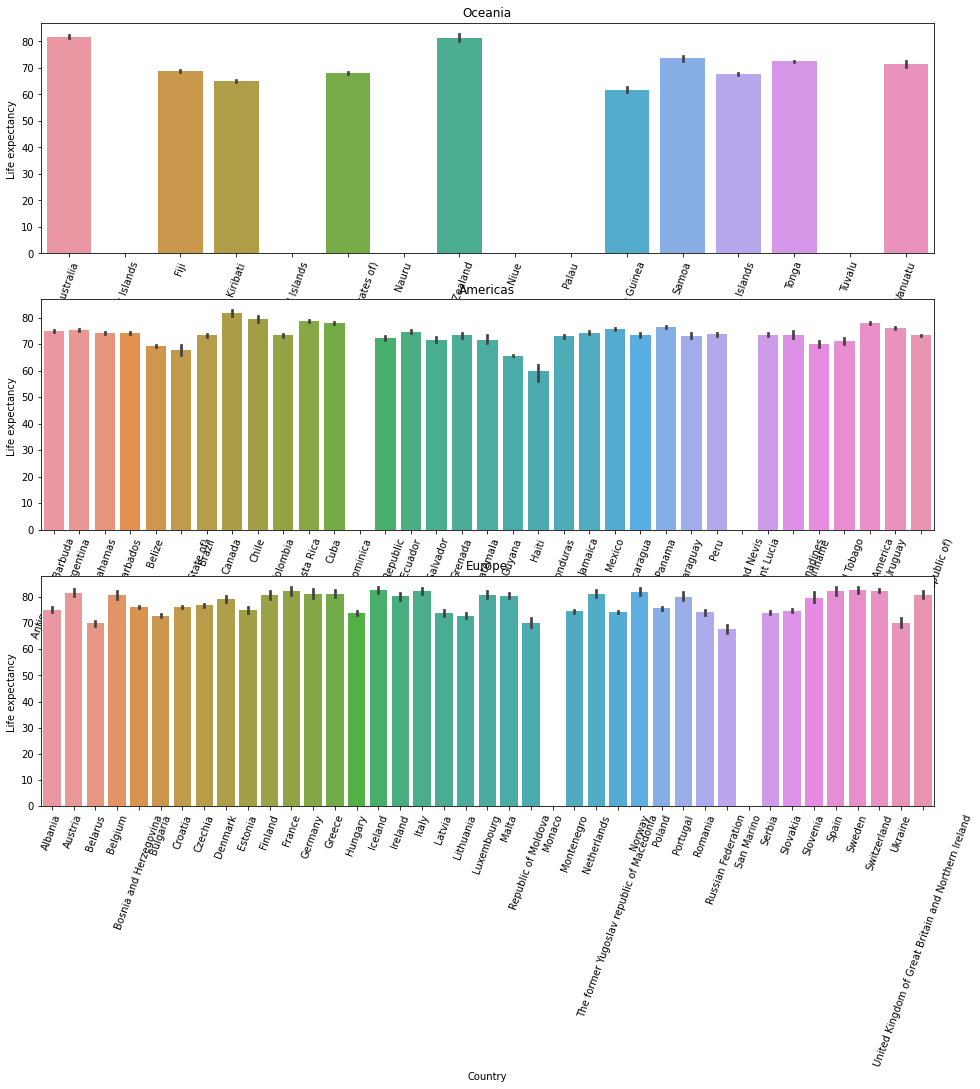

In [15]:
i = len(LifeExpectancy[LifeExpectancy['Life expectancy '].isnull()]['Country'].unique())
j = 1
plt.figure(figsize=(16,50))
for region in LifeExpectancy[LifeExpectancy['Life expectancy '].isnull()]['region'].unique():
    plt.subplot(i,1,j)
    sns.barplot(x = 'Country' , y = 'Life expectancy ' , data = LifeExpectancy[LifeExpectancy['region'] == region])
    plt.title(region)
    plt.xticks(rotation = 70)
    j += 1
plt.show()
    

In [16]:
LifeExpectancy.groupby(by=['region','sub-region'])['Life expectancy '].agg(['mean','std'])

mean       std
region   sub-region                                          
Africa   Northern Africa                  70.990625  4.759347
         Sub-Saharan Africa               57.064583  6.920762
Americas Latin America and the Caribbean  73.073185  4.200099
         Northern America                 79.875000  2.480895
Asia     Central Asia                     67.030000  2.632340
         Eastern Asia                     74.473750  6.735054
         South-eastern Asia               70.035227  6.220933
         Southern Asia                    68.094444  5.650877
         Western Asia                     73.846691  4.189971
Europe   Eastern Europe                   72.548125  3.570969
         Northern Europe                  78.915000  4.341350
         Southern Europe                  77.947917  3.855233
         Western Europe                   81.400000  2.903027
Oceania  Australia and New Zealand        81.575000  2.327674
         Melanesia                        67.373438  3.967217
         Micronesia                       66.675000  1.730001
         Polynesia                        73.075000  1.561843

In [17]:
LifeExpectancy.drop(LifeExpectancy[LifeExpectancy['Life expectancy '].isnull()].index , axis=0 , 
                                     inplace = True)

In [18]:
for country in LifeExpectancy['Country'].unique():
    if (LifeExpectancy[LifeExpectancy['Country'] == country]['Alcohol'].isnull().sum() > 1):
        print("{} : {} ".format(country, LifeExpectancy[LifeExpectancy['Country'] == country]['Alcohol'].isnull().sum()))

Montenegro : 2 
South Sudan : 16 


In [19]:
LifeExpectancy[LifeExpectancy['Country'] == 'South Sudan'].isnull().sum()

region                              0
sub-region                          0
Country                             0
Year                                0
Status                              0
Life expectancy                     0
Adult Mortality                     0
infant deaths                       0
Alcohol                            16
percentage expenditure              0
Hepatitis B                        15
Measles                             0
 BMI                               16
under-five deaths                   0
Polio                              11
Total expenditure                  13
Diphtheria                         11
 HIV/AIDS                           0
GDP                                 8
Population                          0
 thinness  1-19 years              16
 thinness 5-9 years                16
Income composition of resources     0
Schooling                           0
dtype: int64

In [20]:
LifeExpectancy.drop(LifeExpectancy[LifeExpectancy['Country'] == 'South Sudan'].index , axis=0 , 
                                     inplace = True)

In [21]:
for country in LifeExpectancy['Country'].unique():
    LifeExpectancy.loc[LifeExpectancy['Country'] == country , 'Alcohol'] = LifeExpectancy[LifeExpectancy['Country'] == country]['Alcohol'].interpolate(limit_direction ='both')

In [22]:
for country in LifeExpectancy['Country'].unique():
    if (LifeExpectancy[LifeExpectancy['Country'] == country][' BMI '].isnull().sum() > 0):
        print("{} : {} ".format(country , LifeExpectancy[LifeExpectancy['Country'] == country][' BMI '].isnull().sum()))

Sudan : 16 


In [23]:
LifeExpectancy[LifeExpectancy['Country'] == 'Sudan'].isnull().sum()

region                              0
sub-region                          0
Country                             0
Year                                0
Status                              0
Life expectancy                     0
Adult Mortality                     0
infant deaths                       0
Alcohol                             0
percentage expenditure              0
Hepatitis B                         5
Measles                             0
 BMI                               16
under-five deaths                   0
Polio                               0
Total expenditure                   1
Diphtheria                          0
 HIV/AIDS                           0
GDP                                 0
Population                          0
 thinness  1-19 years              16
 thinness 5-9 years                16
Income composition of resources     0
Schooling                           0
dtype: int64

In [24]:
LifeExpectancy.drop(LifeExpectancy[LifeExpectancy['Country'] == 'Sudan'][' BMI '].isnull().index , axis=0 , 
                                     inplace = True)

In [25]:
for country in LifeExpectancy['Country'].unique():
    if (LifeExpectancy[LifeExpectancy['Country'] == country]['Polio'].isnull().sum() > 1):
        print(country,':',LifeExpectancy[LifeExpectancy['Country'] == country]['Polio'].isnull().sum())

Montenegro : 6
Timor-Leste : 2


In [26]:
for country in LifeExpectancy['Country'].unique():
    LifeExpectancy.loc[LifeExpectancy['Country'] == country , 'Polio'] = LifeExpectancy[LifeExpectancy['Country'] == country]['Polio'].interpolate(limit_direction ='both')
    

In [27]:
for country in LifeExpectancy['Country'].unique():
    if (LifeExpectancy[LifeExpectancy['Country'] == country]['Total expenditure'].isnull().sum() > 1):
        print(country,':',LifeExpectancy[LifeExpectancy['Country'] == country]['Total expenditure'].isnull().sum())

Iraq : 4
Democratic People's Republic of Korea : 16
Somalia : 16


In [28]:
LifeExpectancy[LifeExpectancy['Country'].isin(['Somalia',"Democratic People's Republic of Korea"])].isnull().sum()

region                              0
sub-region                          0
Country                             0
Year                                0
Status                              0
Life expectancy                     0
Adult Mortality                     0
infant deaths                       0
Alcohol                             0
percentage expenditure              0
Hepatitis B                        16
Measles                             0
 BMI                                0
under-five deaths                   0
Polio                               0
Total expenditure                  32
Diphtheria                          0
 HIV/AIDS                           0
GDP                                29
Population                         32
 thinness  1-19 years               0
 thinness 5-9 years                 0
Income composition of resources    32
Schooling                          32
dtype: int64

In [29]:
LifeExpectancy.drop(LifeExpectancy[LifeExpectancy['Country'].isin(['Somalia',"Democratic People's Republic of Korea"])]['Total expenditure'].isnull().index , axis=0 , 
                                     inplace = True)

In [30]:
for country in LifeExpectancy['Country'].unique():
    LifeExpectancy.loc[LifeExpectancy['Country'] == country , 'Total expenditure'] = LifeExpectancy[LifeExpectancy['Country'] == country]['Total expenditure'].interpolate(limit_direction ='both')

In [31]:
for country in LifeExpectancy['Country'].unique():
    if (LifeExpectancy[LifeExpectancy['Country'] == country]['Diphtheria '].isnull().sum() > 1):
        print(country,':',LifeExpectancy[LifeExpectancy['Country'] == country]['Diphtheria '].isnull().sum())

Montenegro : 6
Timor-Leste : 2


In [32]:
for country in LifeExpectancy['Country'].unique():
    LifeExpectancy.loc[LifeExpectancy['Country'] == country , 'Diphtheria '] = LifeExpectancy[LifeExpectancy['Country'] == country]['Diphtheria '].interpolate(limit_direction ='both')

In [33]:
for country in LifeExpectancy['Country'].unique():
    if (LifeExpectancy[LifeExpectancy['Country'] == country]['Income composition of resources'].isnull().sum() > 0):
        print(country,':',LifeExpectancy[LifeExpectancy['Country'] == country]['Income composition of resources'].isnull().sum())

Democratic Republic of the Congo : 16
Côte d'Ivoire : 16
Czechia : 16
Republic of Korea : 16
Republic of Moldova : 16
United Republic of Tanzania : 16
United Kingdom of Great Britain and Northern Ireland : 16
United States of America : 16


In [34]:
LifeExpectancy[LifeExpectancy['Country'].isin(["Côte d'Ivoire",'Czechia','Democratic Republic of the Congo','Republic of Korea','Republic of Moldova','United Kingdom of Great Britain and Northern Ireland','United Republic of Tanzania','United States of America'])].isnull().sum()

region                               0
sub-region                           0
Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                         28
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
 HIV/AIDS                            0
GDP                                128
Population                         128
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources    128
Schooling                          128
dtype: int64

In [35]:
LifeExpectancy.drop(LifeExpectancy[LifeExpectancy['Country'].isin(["Côte d'Ivoire",'Czechia','Democratic Republic of the Congo','Republic of Korea','Republic of Moldova','United Kingdom of Great Britain and Northern Ireland','United Republic of Tanzania','United States of America'])]['Income composition of resources'].isnull().index , axis=0 , 
                                     inplace = True)

In [36]:
for country in LifeExpectancy['Country'].unique():
    if (LifeExpectancy[LifeExpectancy['Country'] == country]['Hepatitis B'].isnull().sum() > 15):
        print(country,':',LifeExpectancy[LifeExpectancy['Country'] == country]['Hepatitis B'].isnull().sum())

Denmark : 16
Finland : 16
Hungary : 16
Iceland : 16
Japan : 16
Norway : 16
Slovenia : 16
Switzerland : 16


In [37]:
LifeExpectancy[LifeExpectancy['Country'].isin(["Switzerland",'Slovenia','Norway','Japan','Iceland','Hungary','Finland','Denmark'])].isnull().sum()

region                               0
sub-region                           0
Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        128
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
 HIV/AIDS                            0
GDP                                  0
Population                           0
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources      0
Schooling                            0
dtype: int64

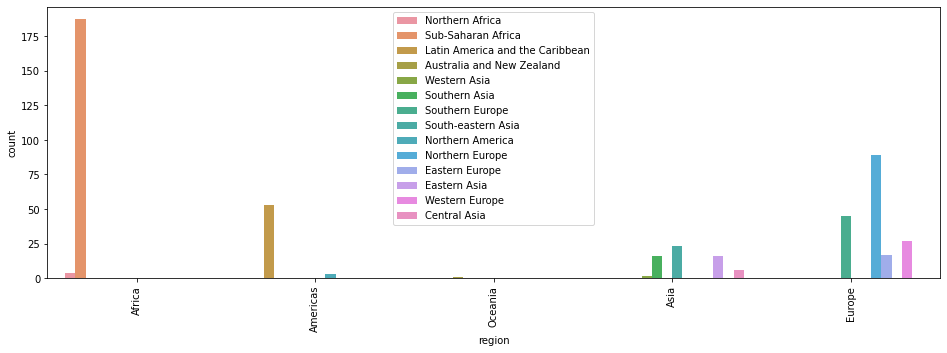

In [38]:
plt.figure(figsize=(16,5))
sns.countplot(x = 'region' , hue = 'sub-region' ,data = LifeExpectancy[LifeExpectancy['Hepatitis B'].isnull()])
plt.xticks(rotation=90)
plt.legend(loc=9)
plt.show()

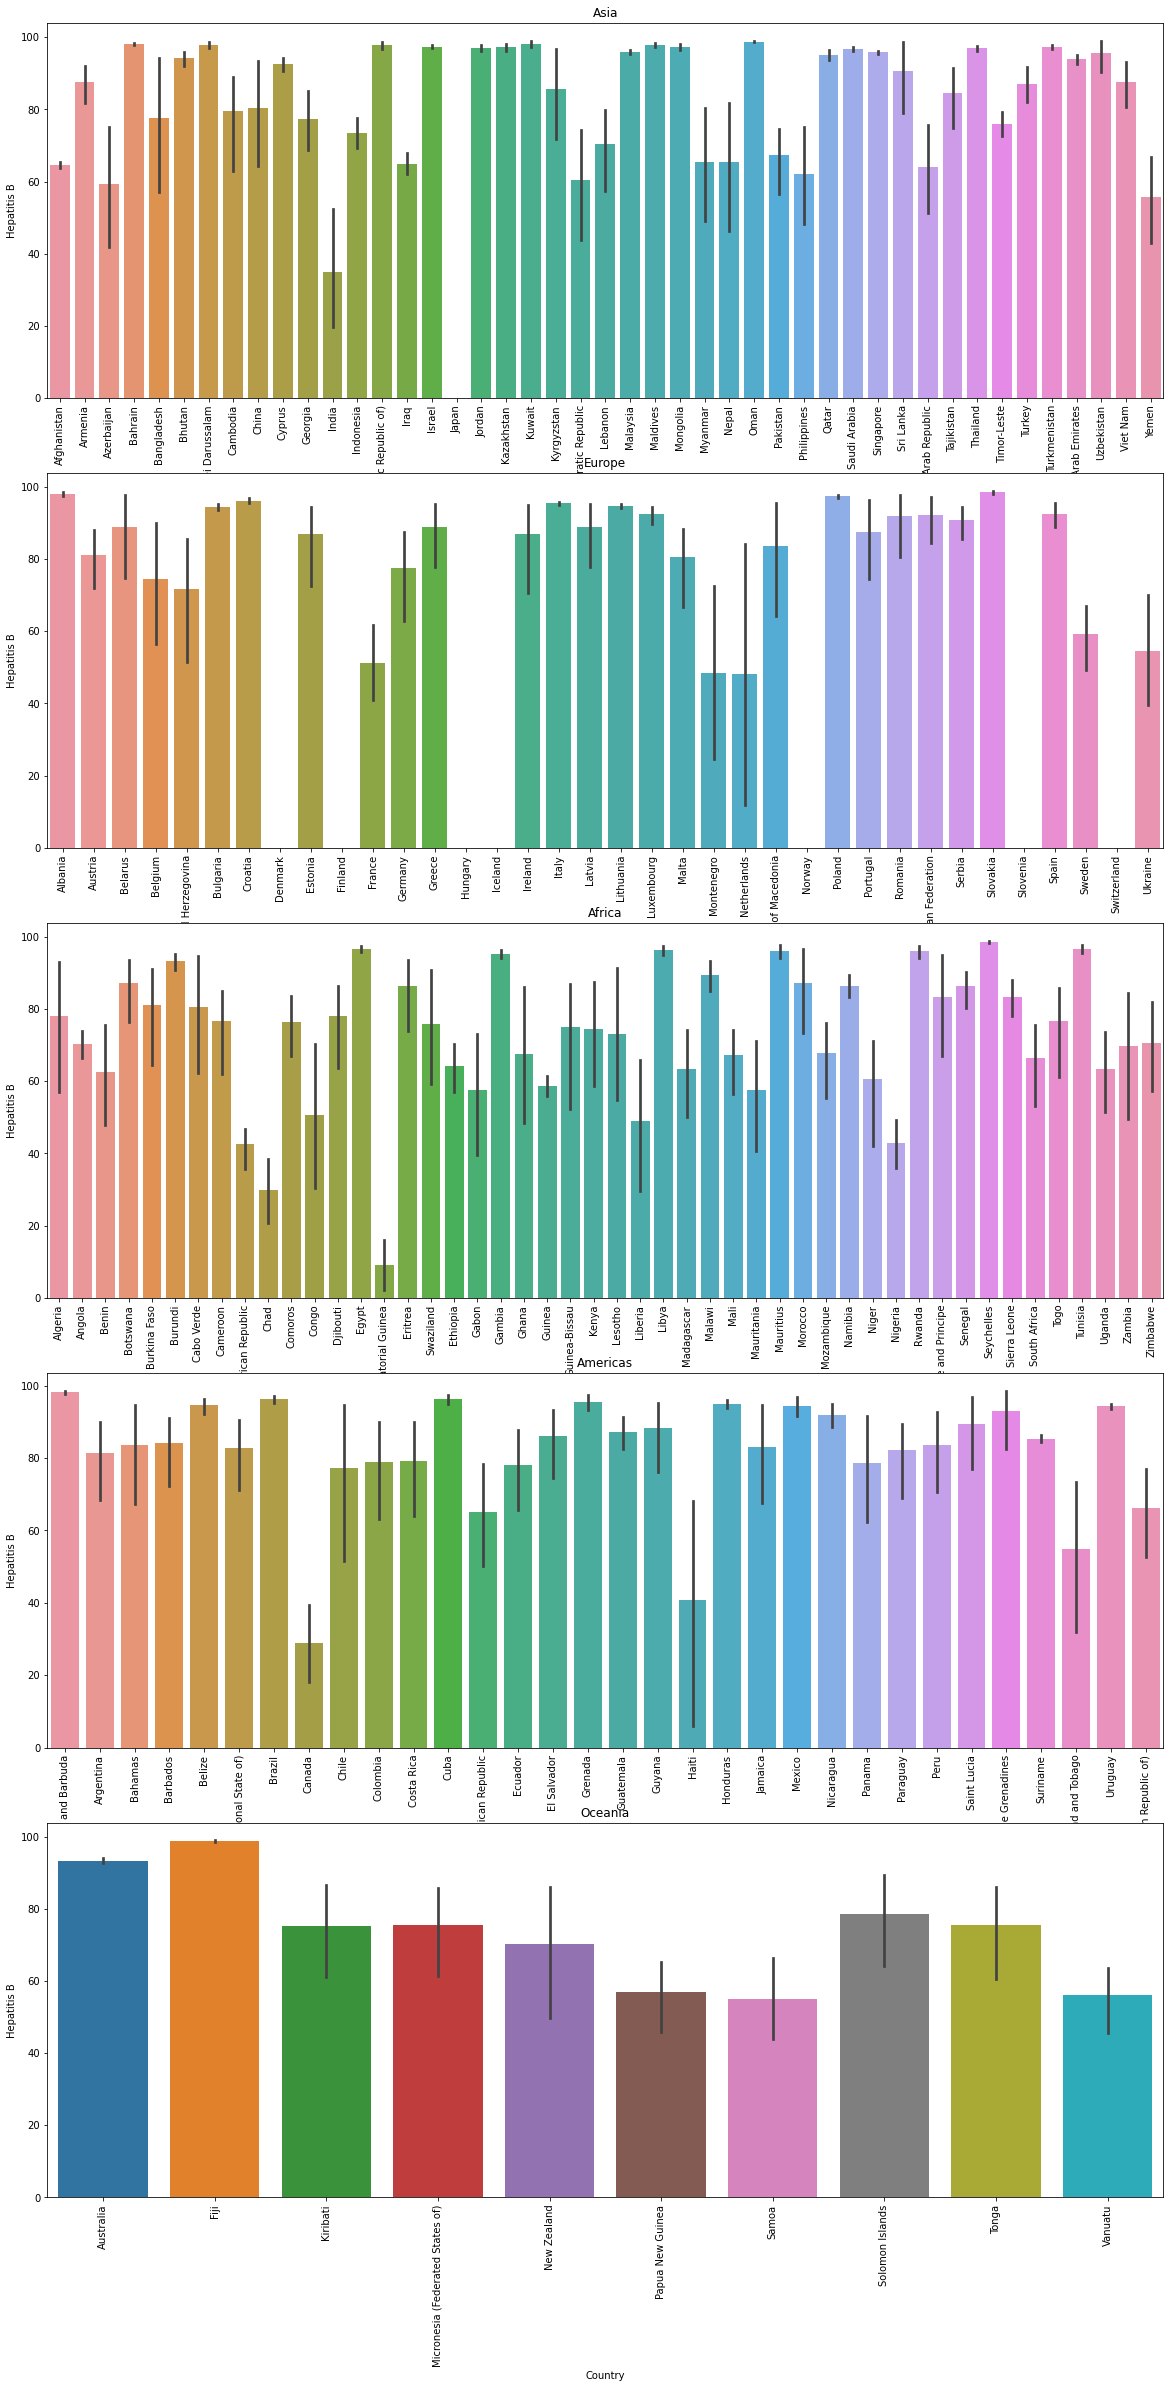

In [40]:
plt.figure(figsize = (20,40))
i = 1
for region in LifeExpectancy['region'].unique():
    plt.subplot(5 , 1 , i)
    plt.title(region)
    sns.barplot(x = 'Country' , y = 'Hepatitis B' , data = LifeExpectancy[LifeExpectancy['region'] == region] )
    plt.xticks(rotation=90)
    
    i += 1
plt.show()

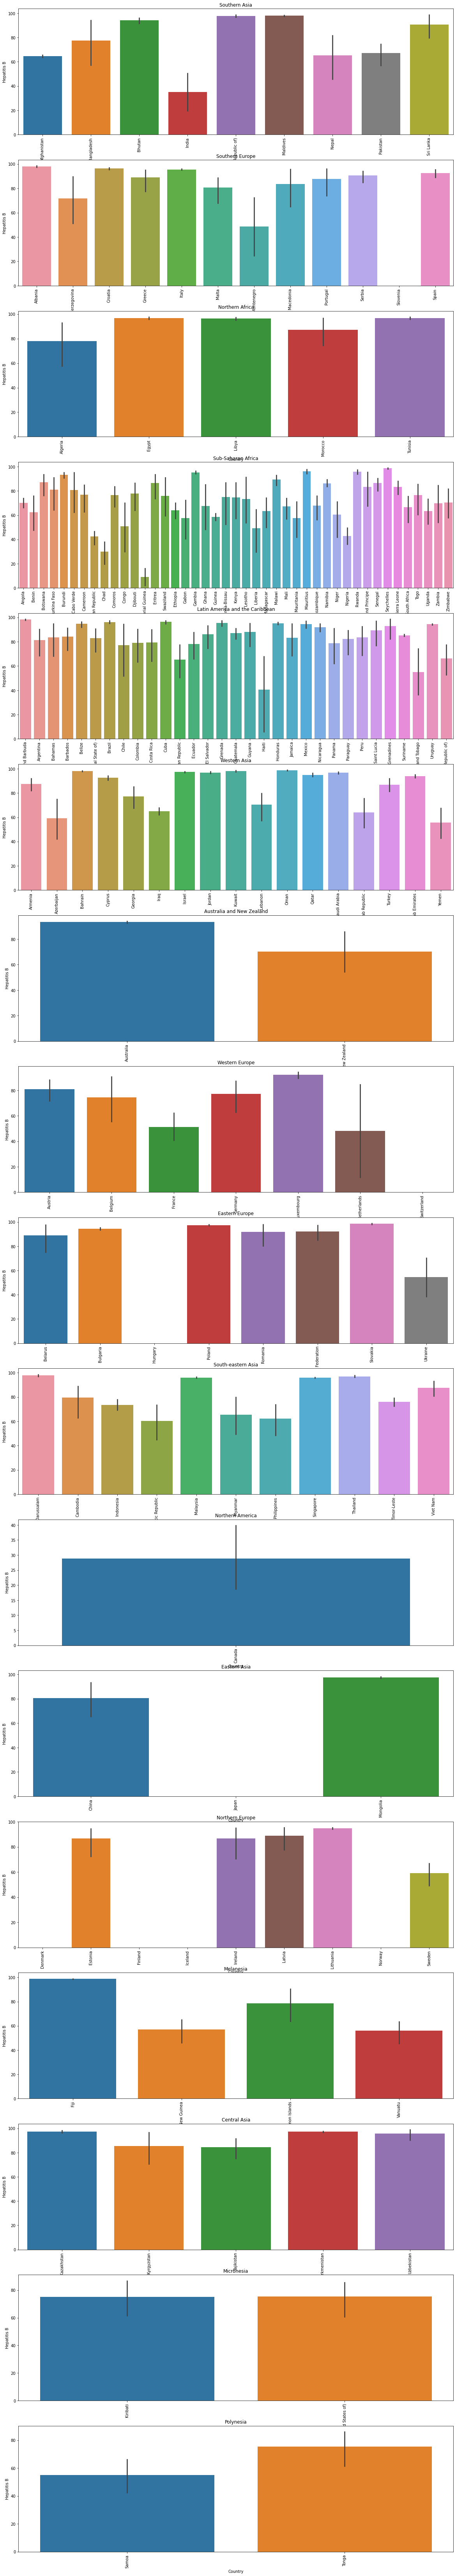

In [41]:
plt.figure(figsize = (20,120))
i = 1
for sub_region in LifeExpectancy['sub-region'].unique():
    plt.subplot(17 , 1 , i)
    plt.title(sub_region)
    sns.barplot(x = 'Country' , y = 'Hepatitis B' , data = LifeExpectancy[LifeExpectancy['sub-region'] == sub_region] )
    plt.xticks(rotation=90)
    
    i += 1
plt.show()

In [42]:
for country in LifeExpectancy['Country'].unique():
    if (LifeExpectancy[LifeExpectancy['Country'] == country]['Hepatitis B'].isnull().sum() < 16):
        LifeExpectancy.loc[LifeExpectancy['Country'] == country , 'Hepatitis B'] = LifeExpectancy[LifeExpectancy['Country'] == country]['Hepatitis B'].interpolate(limit_direction ='both')
    else :
        print(country)
        LifeExpectancy.drop(LifeExpectancy[LifeExpectancy['Country']==country].index, axis=0 , inplace = True)

Denmark
Finland
Hungary
Iceland
Japan
Norway
Slovenia
Switzerland


In [44]:
for country in LifeExpectancy['Country'].unique():
    if (LifeExpectancy[LifeExpectancy['Country'] == country]['GDP'].isnull().sum() > 15):
        print(country,':',LifeExpectancy[LifeExpectancy['Country'] == country]['GDP'].isnull().sum())

Bahamas : 16
Bolivia (Plurinational State of) : 16
Congo : 16
Egypt : 16
Gambia : 16
Iran (Islamic Republic of) : 16
Kyrgyzstan : 16
Lao People's Democratic Republic : 16
Micronesia (Federated States of) : 16
The former Yugoslav republic of Macedonia : 16
Saint Lucia : 16
Saint Vincent and the Grenadines : 16
Slovakia : 16
Venezuela (Bolivarian Republic of) : 16
Viet Nam : 16
Yemen : 16


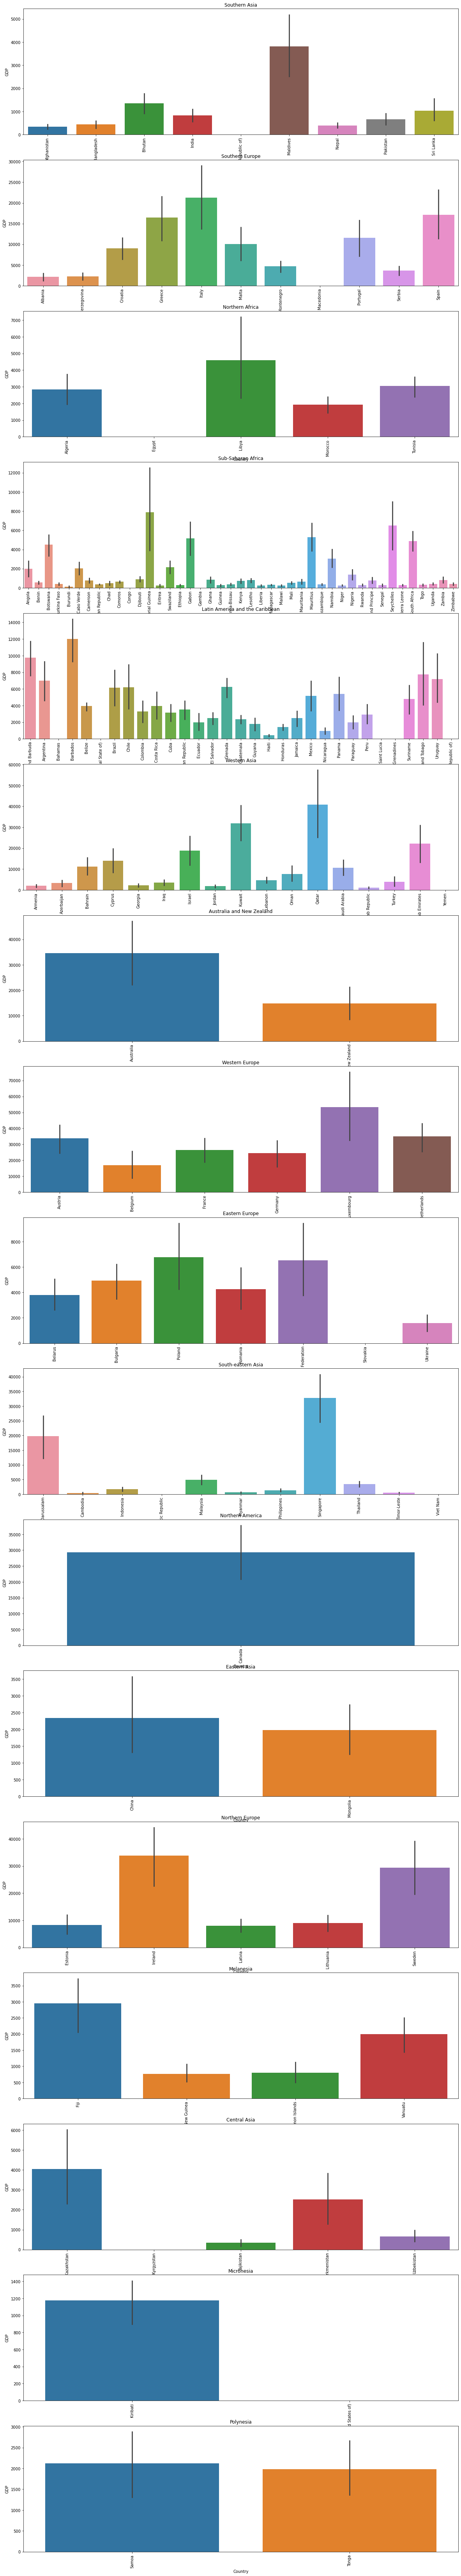

In [45]:
plt.figure(figsize = (20,120))
i = 1
for sub_region in LifeExpectancy['sub-region'].unique():
    plt.subplot(17 , 1 , i)
    plt.title(sub_region)
    sns.barplot(x = 'Country' , y = 'GDP' , data = LifeExpectancy[LifeExpectancy['sub-region'] == sub_region] )
    plt.xticks(rotation=90)
    
    i += 1
plt.show()

In [46]:
for country in LifeExpectancy['Country'].unique():
    if (LifeExpectancy[LifeExpectancy['Country'] == country]['GDP'].isnull().sum() > 15):
        LifeExpectancy.drop(LifeExpectancy[LifeExpectancy['Country']==country].index, axis=0 , inplace = True)
    else :
        LifeExpectancy.loc[LifeExpectancy['Country'] == country , 'GDP'] = LifeExpectancy[LifeExpectancy['Country'] == country]['GDP'].interpolate(limit_direction ='both')
        

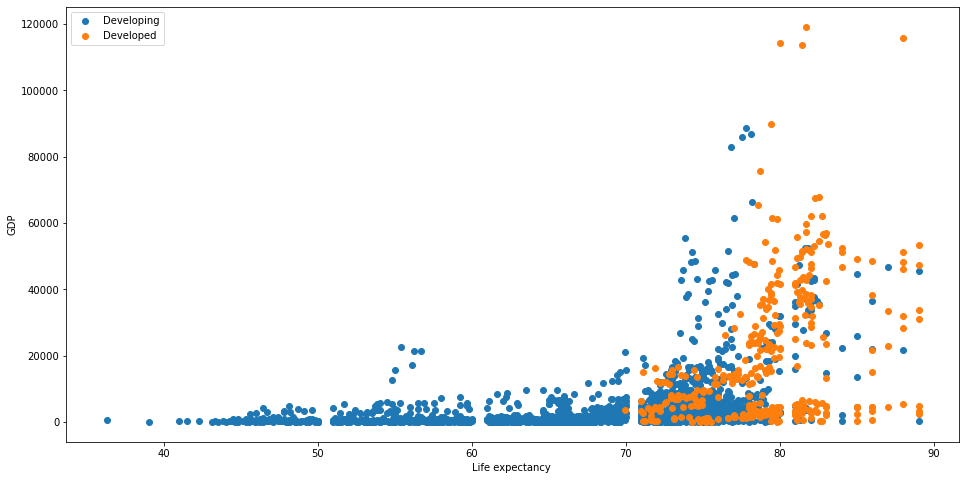

In [47]:
plt.figure(figsize=(16,8))
for status in LifeExpectancy['Status'].unique():
    plt.scatter(LifeExpectancy[LifeExpectancy['Status']==status]['Life expectancy '] , LifeExpectancy[LifeExpectancy['Status']==status]['GDP'],
               label = status)
plt.xlabel('Life expectancy ')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [48]:
for country in LifeExpectancy['Country'].unique():
    if (LifeExpectancy[LifeExpectancy['Country'] == country]['Population'].isnull().sum() > 15):
        print(country,':',LifeExpectancy[LifeExpectancy['Country'] == country]['Population'].isnull().sum())

Antigua and Barbuda : 16
Bahrain : 16
Barbados : 16
Brunei Darussalam : 16
Cuba : 16
Grenada : 16
Kuwait : 16
Libya : 16
New Zealand : 16
Oman : 16
Qatar : 16
Saudi Arabia : 16
Singapore : 16
United Arab Emirates : 16


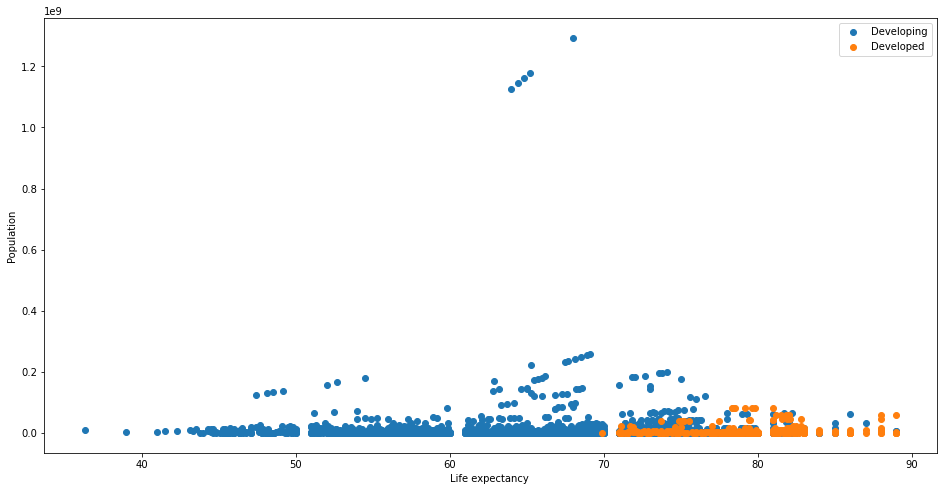

In [49]:
plt.figure(figsize=(16,8))
for status in LifeExpectancy['Status'].unique():
    plt.scatter(LifeExpectancy[LifeExpectancy['Status']==status]['Life expectancy '] , LifeExpectancy[LifeExpectancy['Status']==status]['Population'],
               label = status)
plt.xlabel('Life expectancy ')
plt.ylabel('Population')
plt.legend()
plt.show()

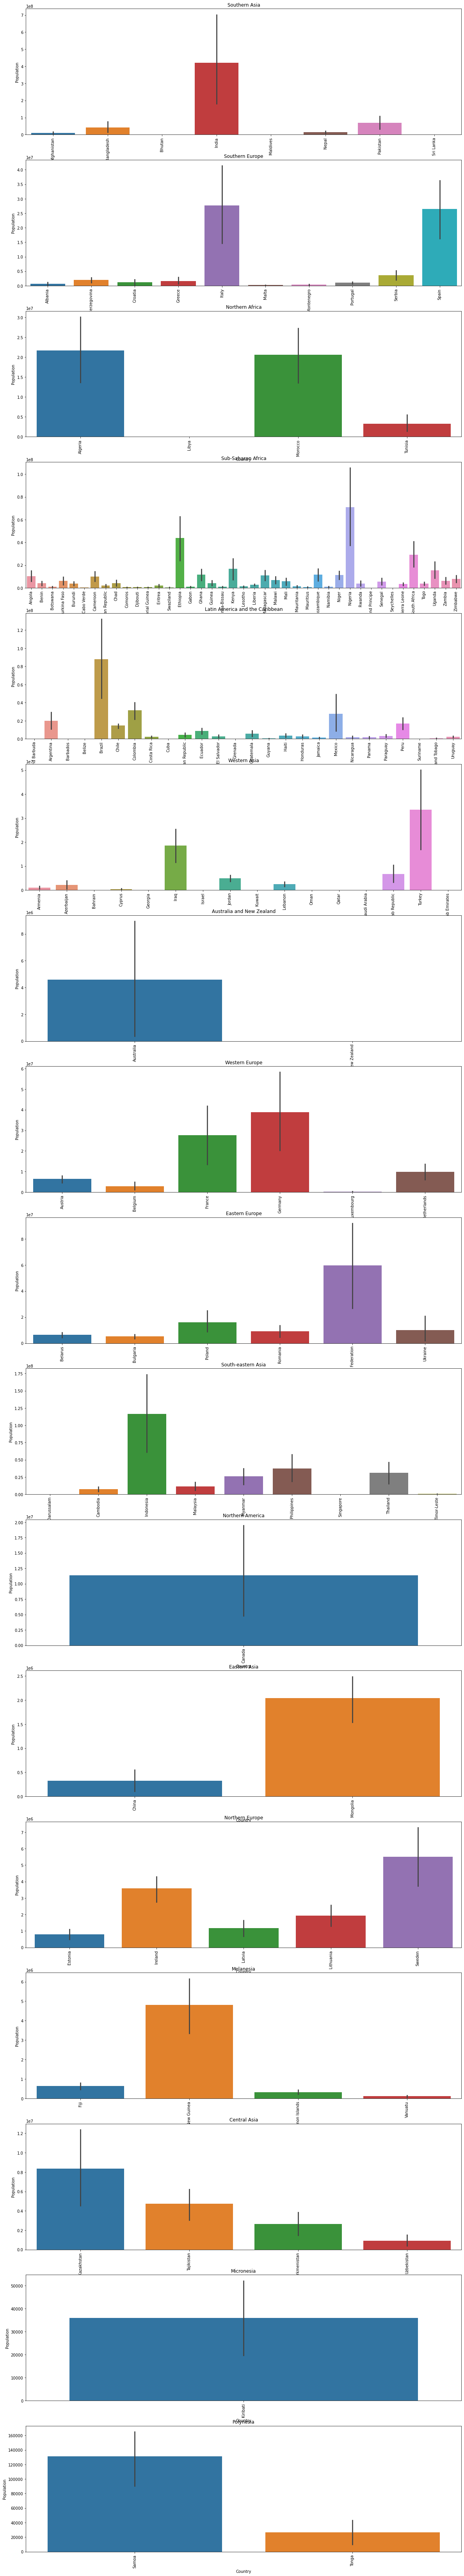

In [50]:
plt.figure(figsize = (20,120))
i = 1
for sub_region in LifeExpectancy['sub-region'].unique():
    plt.subplot(17 , 1 , i)
    plt.title(sub_region)
    sns.barplot(x = 'Country' , y = 'Population' , data = LifeExpectancy[LifeExpectancy['sub-region'] == sub_region] )
    plt.xticks(rotation=90)
    
    i += 1
plt.show()

In [51]:
LifeExpectancy.drop('Population', axis=1 , inplace = True)

# Data Cleaning - Outliers

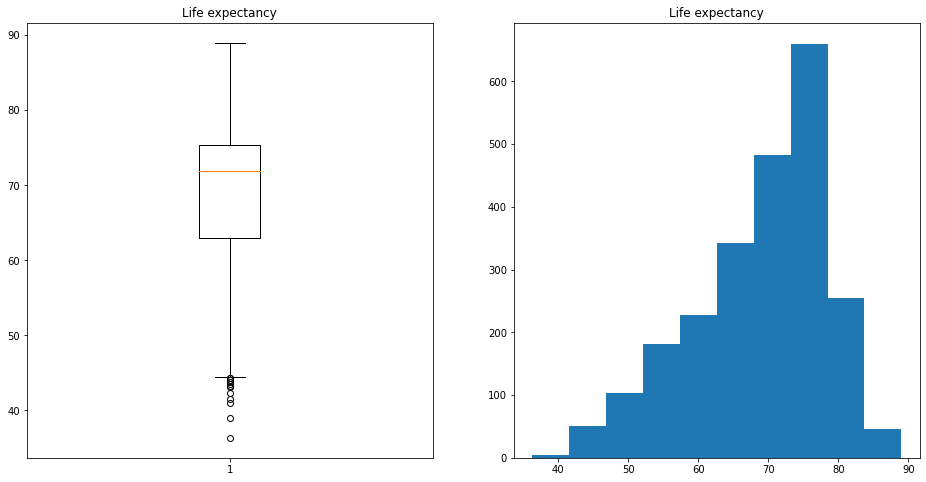

In [52]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.boxplot(LifeExpectancy['Life expectancy '])
plt.title("Life expectancy")
plt.subplot(1,2,2)
plt.hist(LifeExpectancy['Life expectancy '])
plt.title("Life expectancy")
plt.show()

In [53]:
LifeExpectancy.groupby(by='Country')['Life expectancy '].mean().sort_values()

Country
Sierra Leone                46.11250
Central African Republic    48.51250
Lesotho                     48.78125
Angola                      49.01875
Malawi                      49.89375
                              ...   
Australia                   81.81250
Spain                       82.06875
Italy                       82.18750
France                      82.21875
Sweden                      82.51875
Name: Life expectancy , Length: 147, dtype: float64

In [54]:
for country in LifeExpectancy['Country'].unique():
    q75, q25 = np.percentile(LifeExpectancy[LifeExpectancy['Country'] == country]['Life expectancy '], [75 ,25])
    IQR = q75 - q25
    min_value = q25 - (IQR * 1.5)
    max_value = q75 + (IQR * 1.5)
    outlier_value_max = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['Life expectancy '] > max_value)].index
    outlier_value_min = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['Life expectancy '] < min_value)].index
    for i in outlier_value_max:
        LifeExpectancy.at[i,'Life expectancy '] = max_value
    for j in outlier_value_min:
        LifeExpectancy.at[j,'Life expectancy '] = min_value


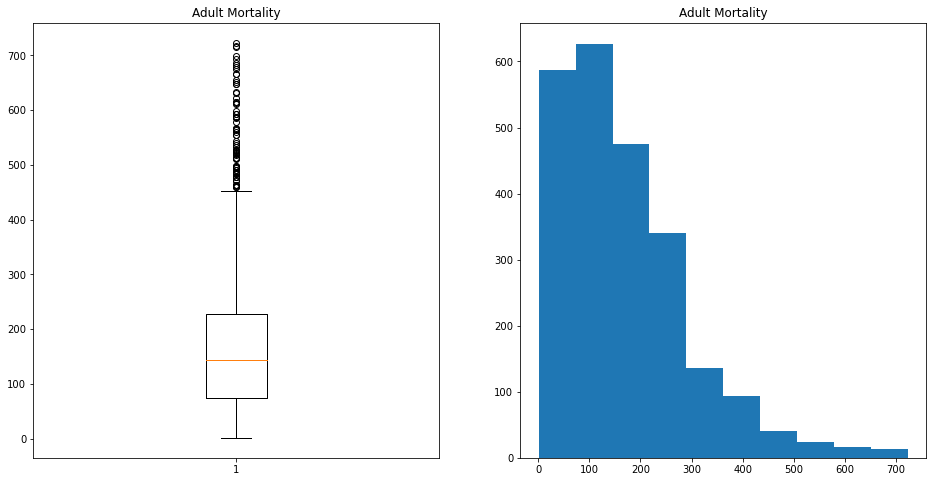

In [55]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.boxplot(LifeExpectancy['Adult Mortality'])
plt.title("Adult Mortality")
plt.subplot(1,2,2)
plt.hist(LifeExpectancy['Adult Mortality'])
plt.title("Adult Mortality")
plt.show()

In [56]:
LifeExpectancy.groupby(by='Country')['Adult Mortality'].mean().sort_values()

Country
Tunisia          18.7500
Albania          45.0625
Saudi Arabia     52.1250
Cyprus           54.1250
Italy            54.1875
                  ...   
South Africa    412.7500
Malawi          424.4375
Botswana        448.1250
Zimbabwe        462.3750
Lesotho         550.0625
Name: Adult Mortality, Length: 147, dtype: float64

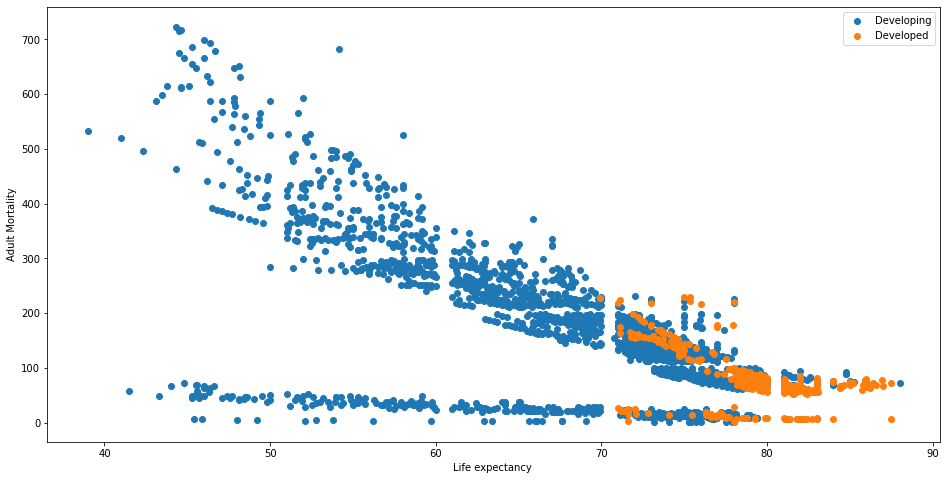

In [57]:
plt.figure(figsize=(16,8))
for status in LifeExpectancy['Status'].unique():
    plt.scatter(LifeExpectancy[LifeExpectancy['Status']==status]['Life expectancy '] , LifeExpectancy[LifeExpectancy['Status']==status]['Adult Mortality'],
               label = status)
plt.xlabel('Life expectancy ')
plt.ylabel('Adult Mortality')
plt.legend()
plt.show()

In [58]:
for country in LifeExpectancy['Country'].unique():
    q75, q25 = np.percentile(LifeExpectancy[LifeExpectancy['Country'] == country]['Adult Mortality'], [75 ,25])
    IQR = q75 - q25
    min_value = q25 - (IQR * 1.5)
    max_value = q75 + (IQR * 1.5)
    outlier_value_max = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['Adult Mortality'] > max_value)].index
    outlier_value_min = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['Adult Mortality'] < min_value)].index
    for i in outlier_value_max:
        LifeExpectancy.at[i,'Adult Mortality'] = max_value 
    for j in outlier_value_min:
        LifeExpectancy.at[j,'Adult Mortality'] = min_value 

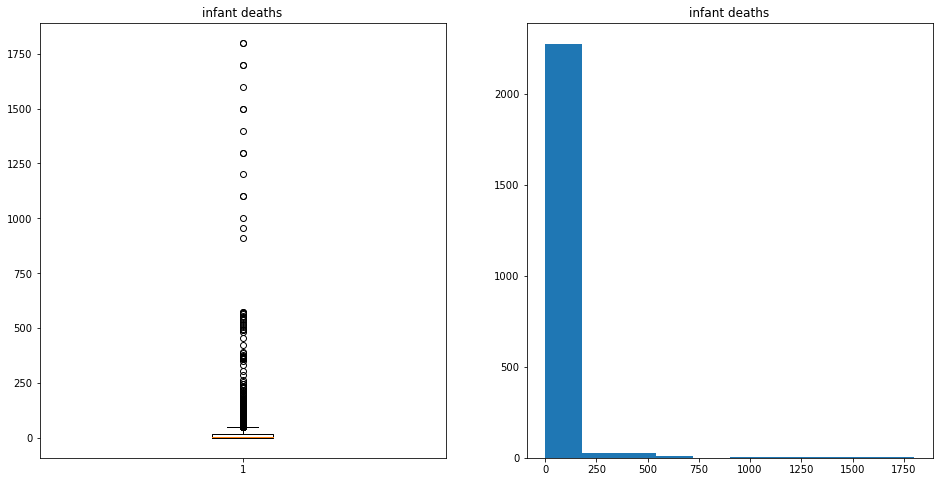

In [59]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.boxplot(LifeExpectancy['infant deaths'])
plt.title("infant deaths")
plt.subplot(1,2,2)
plt.hist(LifeExpectancy['infant deaths'])
plt.title("infant deaths")
plt.show()

In [60]:
LifeExpectancy.groupby(by='Country')['infant deaths'].mean().sort_values()

Country
Latvia                    0.0000
Cyprus                    0.0000
Estonia                   0.0000
Trinidad and Tobago       0.0000
Fiji                      0.0000
                         ...    
Ethiopia                187.7500
China                   294.8750
Pakistan                367.9375
Nigeria                 535.6875
India                  1366.6875
Name: infant deaths, Length: 147, dtype: float64

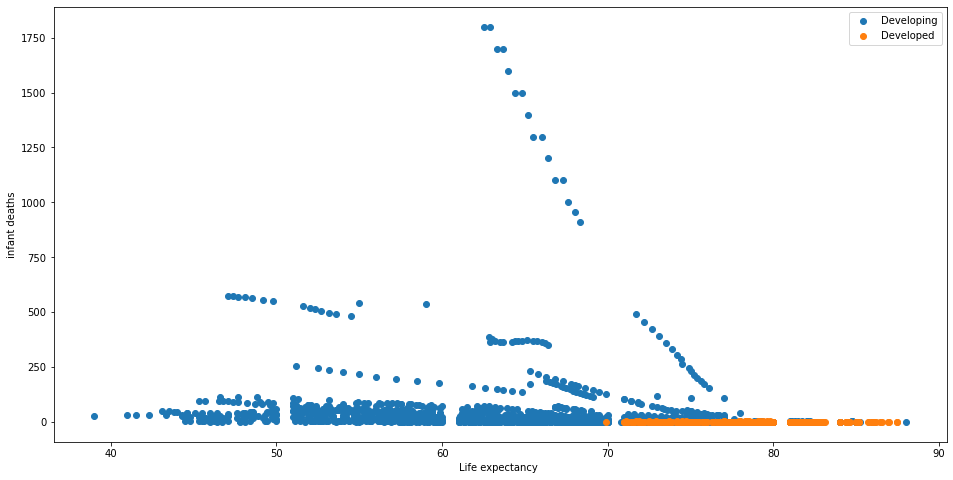

In [61]:
plt.figure(figsize=(16,8))
for status in LifeExpectancy['Status'].unique():
    plt.scatter(LifeExpectancy[LifeExpectancy['Status']==status]['Life expectancy '] , LifeExpectancy[LifeExpectancy['Status']==status]['infant deaths'],
               label = status)
plt.xlabel('Life expectancy ')
plt.ylabel('infant deaths')
plt.legend()
plt.show()

In [62]:
for country in LifeExpectancy['Country'].unique():
    q75, q25 = np.percentile(LifeExpectancy[LifeExpectancy['Country'] == country]['infant deaths'], [75 ,25])
    IQR = q75 - q25
    min_value = q25 - (IQR * 1.5)
    max_value = q75 + (IQR * 1.5)
    outlier_value_max = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['infant deaths'] > max_value)].index
    outlier_value_min = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['infant deaths'] < min_value)].index
    for i in outlier_value_max:
        LifeExpectancy.at[i,'infant deaths'] = max_value 
    for j in outlier_value_min:
        LifeExpectancy.at[j,'infant deaths'] = min_value 

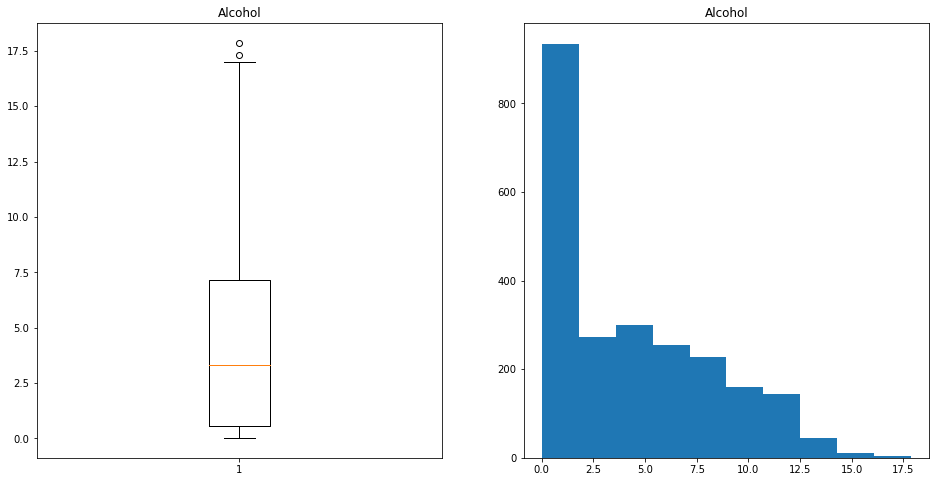

In [63]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.boxplot(LifeExpectancy['Alcohol'])
plt.title("Alcohol")
plt.subplot(1,2,2)
plt.hist(LifeExpectancy['Alcohol'])
plt.title("Alcohol")
plt.show()

In [64]:
LifeExpectancy.groupby(by='Country')['Alcohol'].mean().sort_values()

Country
Libya           0.010000
Bangladesh      0.010000
Mauritania      0.013125
Afghanistan     0.014375
Kuwait          0.020625
                 ...    
France         12.348125
Croatia        12.428750
Ireland        12.535000
Lithuania      12.792500
Belarus        13.525000
Name: Alcohol, Length: 147, dtype: float64

In [65]:
for country in LifeExpectancy['Country'].unique():
    q75, q25 = np.percentile(LifeExpectancy[LifeExpectancy['Country'] == country]['Alcohol'], [75 ,25])
    IQR = q75 - q25
    min_value = q25 - (IQR * 1.5)
    max_value = q75 + (IQR * 1.5)
    outlier_value_max = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['Alcohol'] > max_value)].index
    outlier_value_min = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['Alcohol'] < min_value)].index
    for i in outlier_value_max:
        LifeExpectancy.at[i,'Alcohol'] = max_value 
    for j in outlier_value_min:
        LifeExpectancy.at[j,'Alcohol'] = min_value 

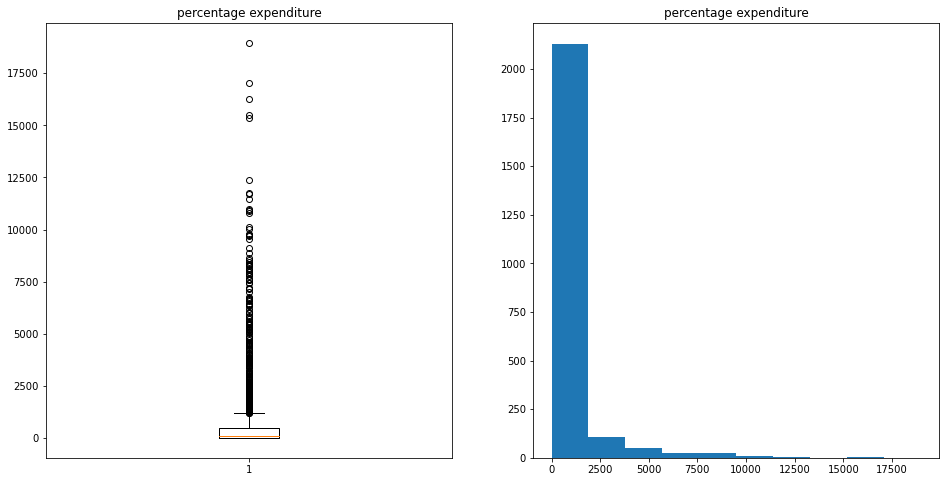

In [66]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.boxplot(LifeExpectancy['percentage expenditure'])
plt.title("percentage expenditure")
plt.subplot(1,2,2)
plt.hist(LifeExpectancy['percentage expenditure'])
plt.title("percentage expenditure")
plt.show()

In [67]:
LifeExpectancy.groupby(by='Country')['percentage expenditure'].mean().sort_values()

Country
Eritrea          6.436069
Myanmar         12.824564
Burundi         15.335498
Guinea          15.891283
Tajikistan      17.277192
                 ...     
Canada        4694.078971
Ireland       4867.312605
Austria       4928.439188
Australia     5332.226473
Luxembourg    8177.576341
Name: percentage expenditure, Length: 147, dtype: float64

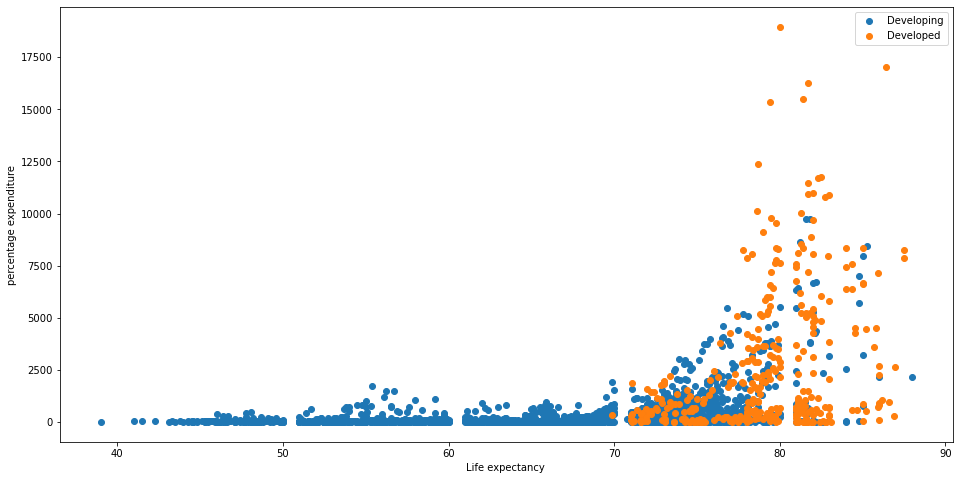

In [68]:
plt.figure(figsize=(16,8))
for status in LifeExpectancy['Status'].unique():
    plt.scatter(LifeExpectancy[LifeExpectancy['Status']==status]['Life expectancy '] , LifeExpectancy[LifeExpectancy['Status']==status]['percentage expenditure'],
               label = status)
plt.xlabel('Life expectancy ')
plt.ylabel('percentage expenditure')
plt.legend()
plt.show()

In [69]:
for country in LifeExpectancy['Country'].unique():
    q75, q25 = np.percentile(LifeExpectancy[LifeExpectancy['Country'] == country]['percentage expenditure'], [75 ,25])
    IQR = q75 - q25
    min_value = q25 - (IQR * 1.5)
    max_value = q75 + (IQR * 1.5)
    outlier_value_max = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['percentage expenditure'] > max_value)].index
    outlier_value_min = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['percentage expenditure'] < min_value)].index
    for i in outlier_value_max:
        LifeExpectancy.at[i,'percentage expenditure'] = max_value 
    for j in outlier_value_min:
        LifeExpectancy.at[j,'percentage expenditure'] = min_value 

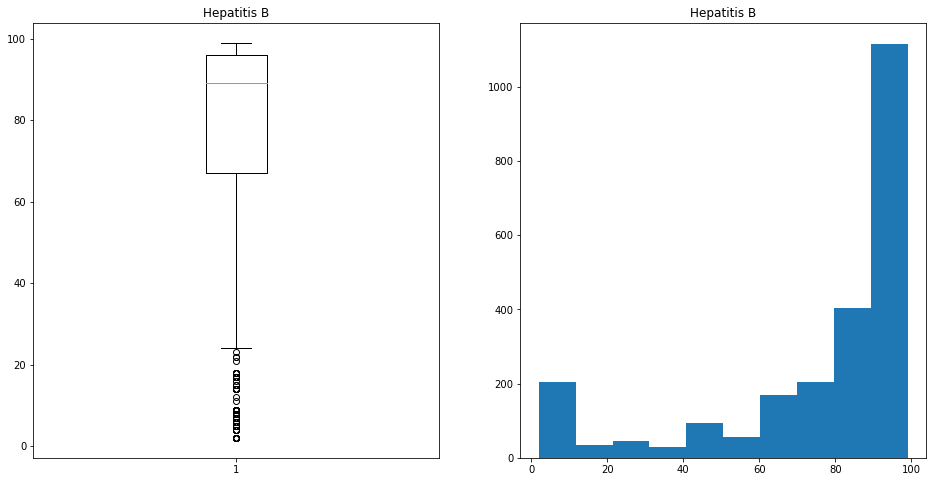

In [70]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.boxplot(LifeExpectancy['Hepatitis B'])
plt.title("Hepatitis B")
plt.subplot(1,2,2)
plt.hist(LifeExpectancy['Hepatitis B'])
plt.title("Hepatitis B")
plt.show()

In [71]:
LifeExpectancy.groupby(by='Country')['Hepatitis B'].mean().sort_values()

Country
Equatorial Guinea       2.8750
Netherlands            16.4375
Chad                   23.4375
Canada                 26.0625
India                  27.7500
                        ...   
Antigua and Barbuda    98.1250
Kuwait                 98.1875
Seychelles             98.6875
Oman                   98.8125
Fiji                   98.8750
Name: Hepatitis B, Length: 147, dtype: float64

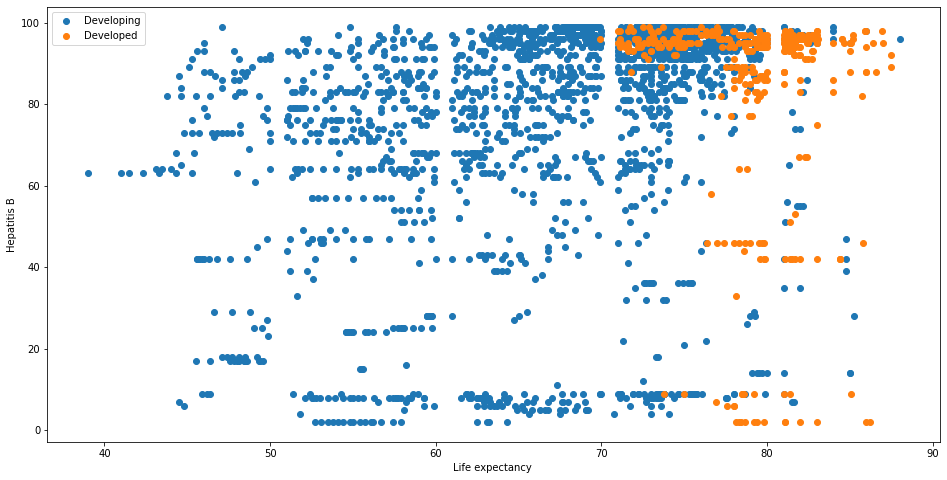

In [72]:
plt.figure(figsize=(16,8))
for status in LifeExpectancy['Status'].unique():
    plt.scatter(LifeExpectancy[LifeExpectancy['Status']==status]['Life expectancy '] , LifeExpectancy[LifeExpectancy['Status']==status]['Hepatitis B'],
               label = status)
plt.xlabel('Life expectancy ')
plt.ylabel('Hepatitis B')
plt.legend()
plt.show()

In [73]:
for country in LifeExpectancy['Country'].unique():
    q75, q25 = np.percentile(LifeExpectancy[LifeExpectancy['Country'] == country]['Hepatitis B'], [75 ,25])
    IQR = q75 - q25
    min_value = q25 - (IQR * 1.5)
    max_value = q75 + (IQR * 1.5)
    outlier_value_max = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['Hepatitis B'] > max_value)].index
    outlier_value_min = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['Hepatitis B'] < min_value)].index
    for i in outlier_value_max:
        LifeExpectancy.at[i,'Hepatitis B'] = max_value 
    for j in outlier_value_min:
        LifeExpectancy.at[j,'Hepatitis B'] = min_value

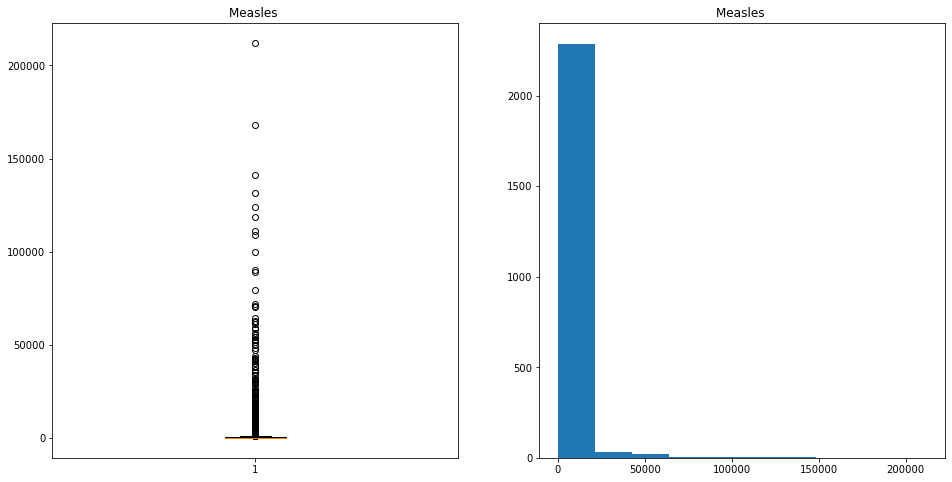

In [74]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.boxplot(LifeExpectancy['Measles '])
plt.title("Measles ")
plt.subplot(1,2,2)
plt.hist(LifeExpectancy['Measles '])
plt.title("Measles ")
plt.show()

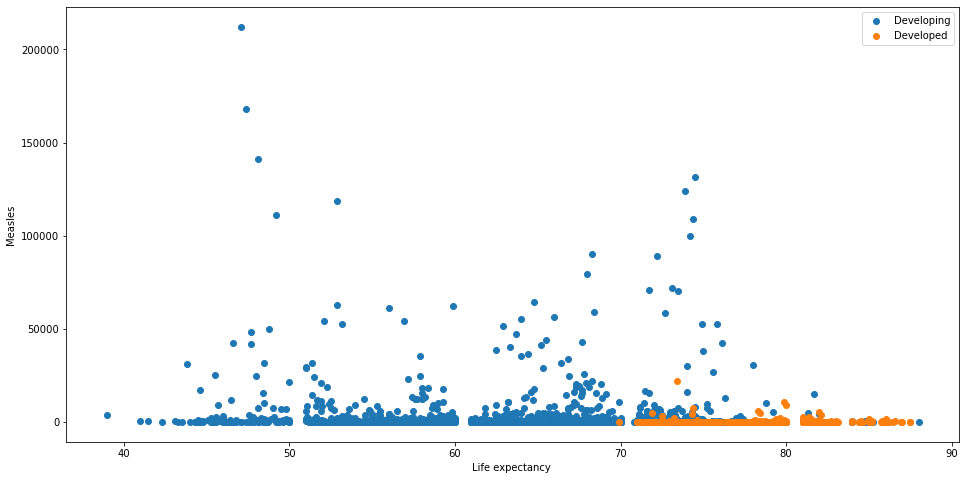

In [75]:
plt.figure(figsize=(16,8))
for status in LifeExpectancy['Status'].unique():
    plt.scatter(LifeExpectancy[LifeExpectancy['Status']==status]['Life expectancy '] , LifeExpectancy[LifeExpectancy['Status']==status]['Measles '],
               label = status)
plt.xlabel('Life expectancy ')
plt.ylabel('Measles ')
plt.legend()
plt.show()

In [76]:
for country in LifeExpectancy['Country'].unique():
    q75, q25 = np.percentile(LifeExpectancy[LifeExpectancy['Country'] == country]['Measles '], [75 ,25])
    IQR = q75 - q25
    min_value = q25 - (IQR * 1.5)
    max_value = q75 + (IQR * 1.5)
    outlier_value_max = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['Measles '] > max_value)].index
    outlier_value_min = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['Measles '] < min_value)].index
    for i in outlier_value_max:
        LifeExpectancy.at[i,'Measles '] = max_value 
    for j in outlier_value_min:
        LifeExpectancy.at[j,'Measles '] = min_value 

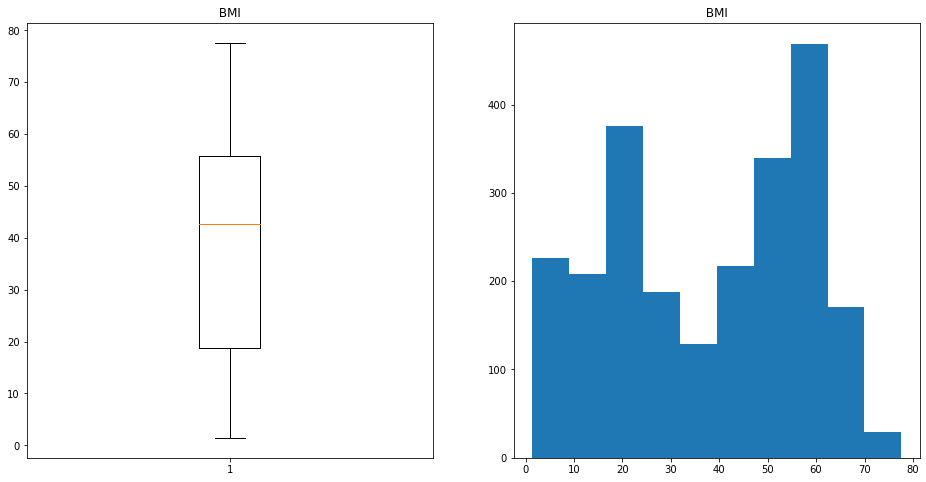

In [77]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.boxplot(LifeExpectancy[' BMI '])
plt.title(' BMI ')
plt.subplot(1,2,2)
plt.hist(LifeExpectancy[' BMI '])
plt.title(' BMI ')
plt.show()

In [78]:
outlier_value=[]
for country in LifeExpectancy['Country'].unique():
    q75, q25 = np.percentile(LifeExpectancy[LifeExpectancy['Country'] == country][' BMI '], [75 ,25])
    IQR = q75 - q25
    min_value = q25 - (IQR * 1.5)
    max_value = q75 + (IQR * 1.5)
    outlier_value_number = len((np.where((LifeExpectancy[LifeExpectancy['Country'] == country][' BMI '] > max_value)| (LifeExpectancy[LifeExpectancy['Country'] == country][' BMI '] < min_value))[0]))
    outlier_value.append({'country': country,'outlier_value_number': outlier_value_number})
df = pd.DataFrame(outlier_value)
df[df['outlier_value_number'] > 0]

,country,outlier_value_number
1,Albania,1
2,Algeria,1
3,Angola,1
4,Antigua and Barbuda,2
5,Argentina,1
...,...,...
142,Uruguay,2
143,Uzbekistan,2
144,Vanuatu,1
145,Zambia,2


In [79]:
for country in LifeExpectancy['Country'].unique():
    q75, q25 = np.percentile(LifeExpectancy[LifeExpectancy['Country'] == country][' BMI '], [75 ,25])
    IQR = q75 - q25
    min_value = q25 - (IQR * 1.5)
    max_value = q75 + (IQR * 1.5)
    outlier_value_max = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy[' BMI '] > max_value)].index
    outlier_value_min = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy[' BMI '] < min_value)].index
    for i in outlier_value_max:
        LifeExpectancy.at[i,' BMI '] = max_value 
    for j in outlier_value_min:
        LifeExpectancy.at[j,' BMI '] = min_value 

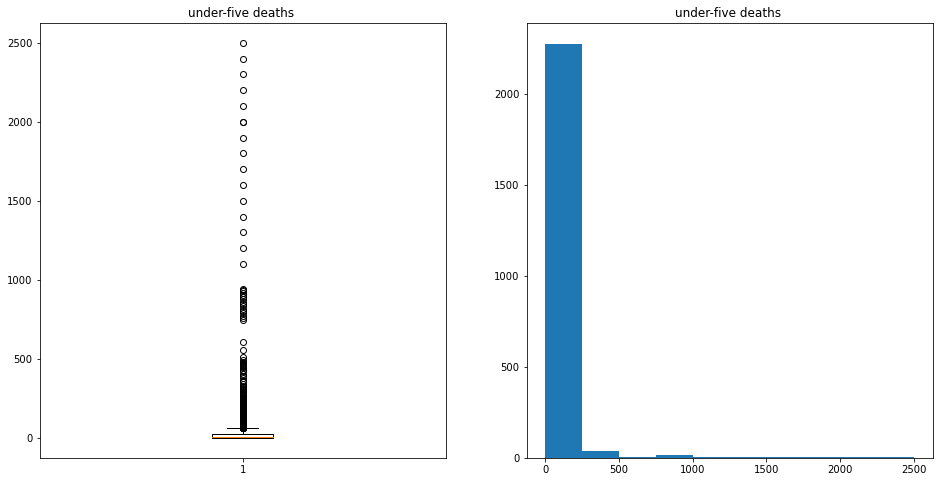

In [80]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.boxplot(LifeExpectancy['under-five deaths '])
plt.title('under-five deaths ')
plt.subplot(1,2,2)
plt.hist(LifeExpectancy['under-five deaths '])
plt.title('under-five deaths ')
plt.show()

In [81]:
LifeExpectancy.groupby(by='Country')['under-five deaths '].mean().sort_values()

Country
Latvia           0.0000
Fiji             0.0000
Montenegro       0.0000
Suriname         0.0000
Cabo Verde       0.0000
                ...    
Ethiopia       288.5000
China          350.0000
Pakistan       461.0000
Nigeria        852.0625
India         1812.5000
Name: under-five deaths , Length: 147, dtype: float64

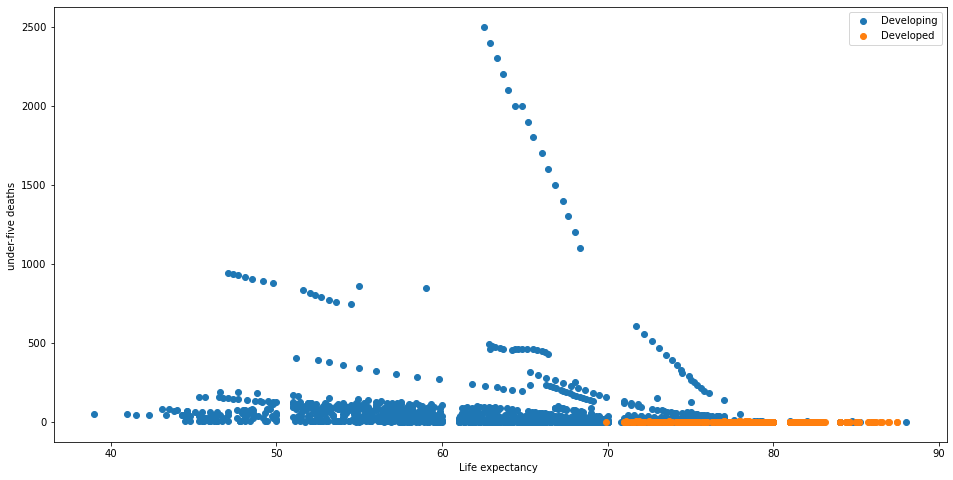

In [82]:
plt.figure(figsize=(16,8))
for status in LifeExpectancy['Status'].unique():
    plt.scatter(LifeExpectancy[LifeExpectancy['Status']==status]['Life expectancy '] , LifeExpectancy[LifeExpectancy['Status']==status]['under-five deaths '],
               label = status)
plt.xlabel('Life expectancy ')
plt.ylabel('under-five deaths ')
plt.legend()
plt.show()

In [83]:
for country in LifeExpectancy['Country'].unique():
    q75, q25 = np.percentile(LifeExpectancy[LifeExpectancy['Country'] == country]['under-five deaths '], [75 ,25])
    IQR = q75 - q25
    min_value = q25 - (IQR * 1.5)
    max_value = q75 + (IQR * 1.5)
    outlier_value_max = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['under-five deaths '] > max_value)].index
    outlier_value_min = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['under-five deaths '] < min_value)].index
    for i in outlier_value_max:
        LifeExpectancy.at[i,'under-five deaths '] = max_value 
    for j in outlier_value_min:
        LifeExpectancy.at[j,'under-five deaths '] = min_value 

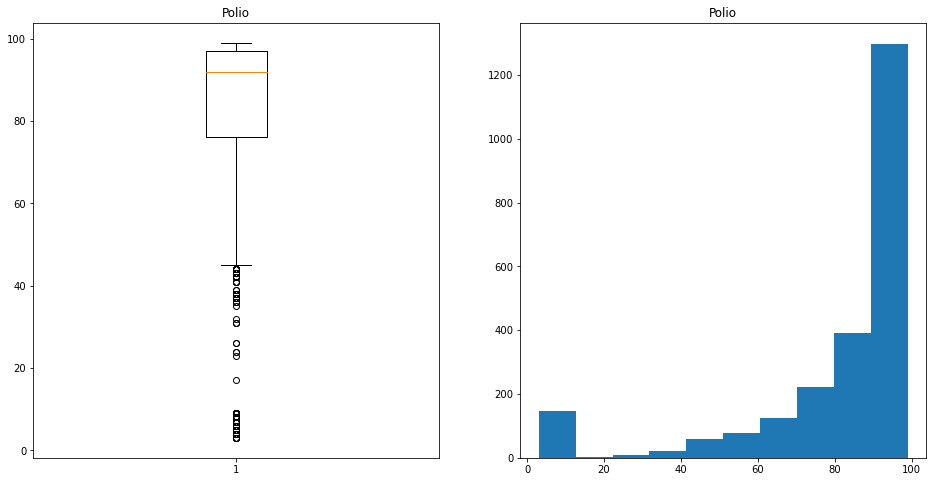

In [84]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.boxplot(LifeExpectancy['Polio'])
plt.title('Polio')
plt.subplot(1,2,2)
plt.hist(LifeExpectancy['Polio'])
plt.title('Polio')
plt.show()

In [85]:
LifeExpectancy.groupby(by='Country')['Polio'].mean().sort_values()

Country
Chad                        32.8750
Equatorial Guinea           36.8750
Central African Republic    41.3125
Nigeria                     41.3125
Angola                      46.1250
                             ...   
Sri Lanka                   98.3750
Oman                        98.5000
Seychelles                  98.5000
Uzbekistan                  98.5625
Cuba                        98.6875
Name: Polio, Length: 147, dtype: float64

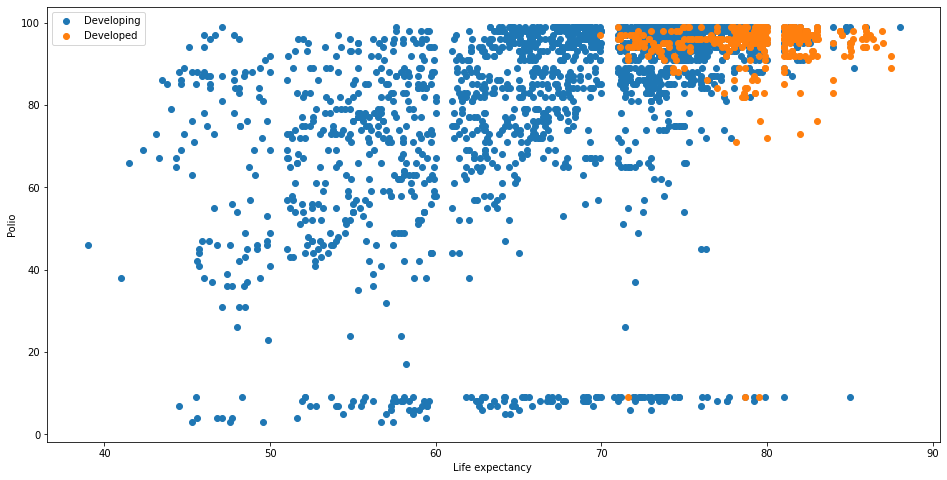

In [86]:
plt.figure(figsize=(16,8))
for status in LifeExpectancy['Status'].unique():
    plt.scatter(LifeExpectancy[LifeExpectancy['Status']==status]['Life expectancy '] , LifeExpectancy[LifeExpectancy['Status']==status]['Polio'],
               label = status)
plt.xlabel('Life expectancy ')
plt.ylabel('Polio')
plt.legend()
plt.show()

In [87]:
for country in LifeExpectancy['Country'].unique():
    q75, q25 = np.percentile(LifeExpectancy[LifeExpectancy['Country'] == country]['Polio'], [75 ,25])
    IQR = q75 - q25
    min_value = q25 - (IQR * 1.5)
    max_value = q75 + (IQR * 1.5)
    outlier_value_max = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['Polio'] > max_value)].index
    outlier_value_min = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['Polio'] < min_value)].index
    for i in outlier_value_max:
        LifeExpectancy.at[i,'Polio'] = max_value 
    for j in outlier_value_min:
        LifeExpectancy.at[j,'Polio'] = min_value 

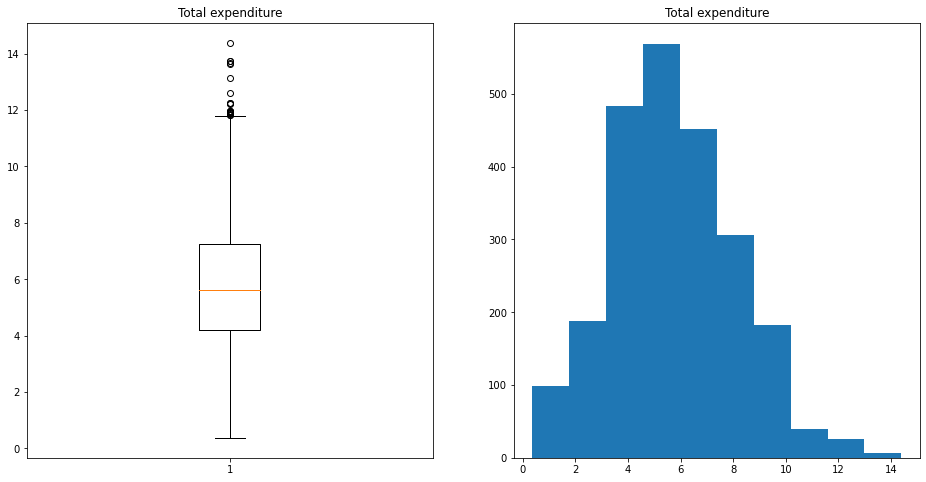

In [88]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.boxplot(LifeExpectancy['Total expenditure'])
plt.title('Total expenditure')
plt.subplot(1,2,2)
plt.hist(LifeExpectancy['Total expenditure'])
plt.title('Total expenditure')
plt.show()

In [89]:
LifeExpectancy.groupby(by='Country')['Total expenditure'].mean().sort_values()

Country
Timor-Leste           1.636250
Myanmar               2.029375
Qatar                 2.575625
Indonesia             2.675000
Brunei Darussalam     2.809375
                       ...    
Australia             8.873125
Greece                9.023750
New Zealand           9.027500
Sierra Leone          9.385625
Sweden               10.057500
Name: Total expenditure, Length: 147, dtype: float64

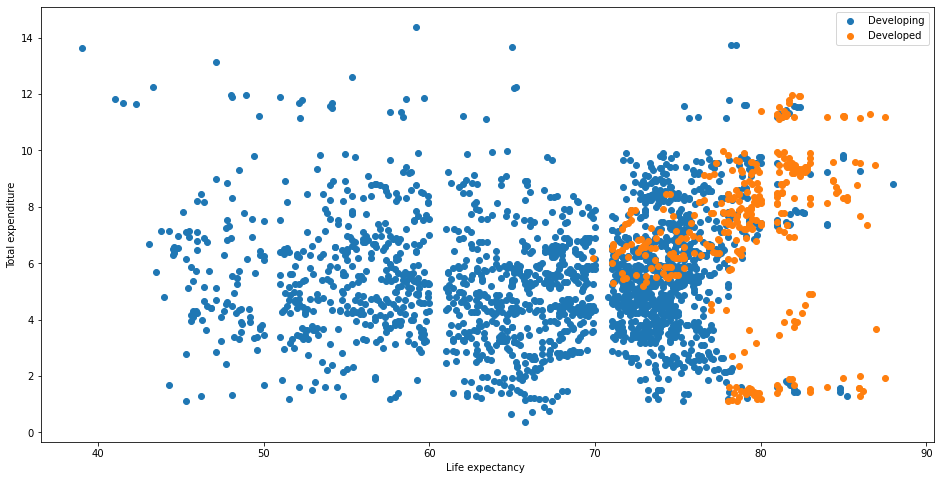

In [90]:
plt.figure(figsize=(16,8))
for status in LifeExpectancy['Status'].unique():
    plt.scatter(LifeExpectancy[LifeExpectancy['Status']==status]['Life expectancy '] , LifeExpectancy[LifeExpectancy['Status']==status]['Total expenditure'],
               label = status)
plt.xlabel('Life expectancy ')
plt.ylabel('Total expenditure')
plt.legend()
plt.show()

In [91]:
for country in LifeExpectancy['Country'].unique():
    q75, q25 = np.percentile(LifeExpectancy[LifeExpectancy['Country'] == country]['Total expenditure'], [75 ,25])
    IQR = q75 - q25
    min_value = q25 - (IQR * 1.5)
    max_value = q75 + (IQR * 1.5)
    outlier_value_max = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['Total expenditure'] > max_value)].index
    outlier_value_min = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['Total expenditure'] < min_value)].index
    for i in outlier_value_max:
        LifeExpectancy.at[i,'Total expenditure'] = max_value 
    for j in outlier_value_min:
        LifeExpectancy.at[j,'Total expenditure'] = min_value 

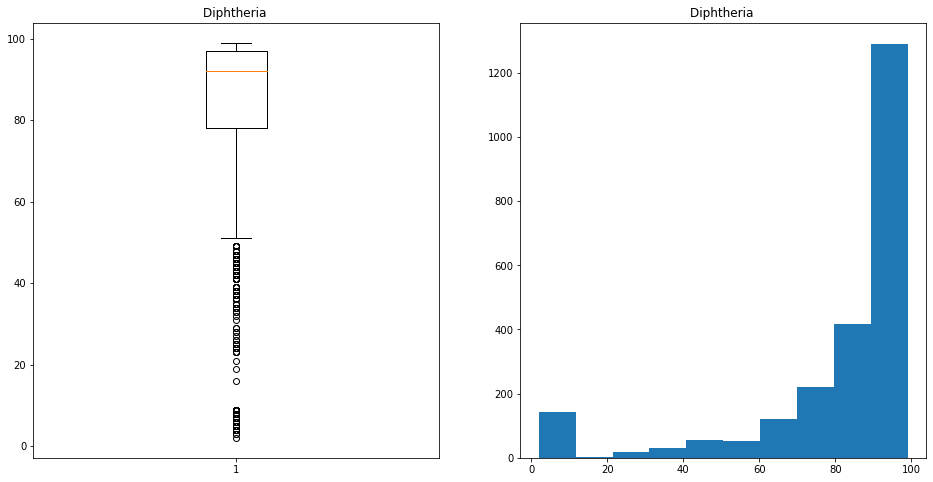

In [92]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.boxplot(LifeExpectancy['Diphtheria '])
plt.title('Diphtheria ')
plt.subplot(1,2,2)
plt.hist(LifeExpectancy['Diphtheria '])
plt.title('Diphtheria ')
plt.show()

In [93]:
LifeExpectancy.groupby(by='Country')['Diphtheria '].mean().sort_values()

Country
Chad                        26.8125
Equatorial Guinea           29.9375
Nigeria                     39.3125
Liberia                     40.6875
Central African Republic    42.4375
                             ...   
Seychelles                  98.5000
Kuwait                      98.5000
Poland                      98.7500
Oman                        98.7500
Luxembourg                  98.9375
Name: Diphtheria , Length: 147, dtype: float64

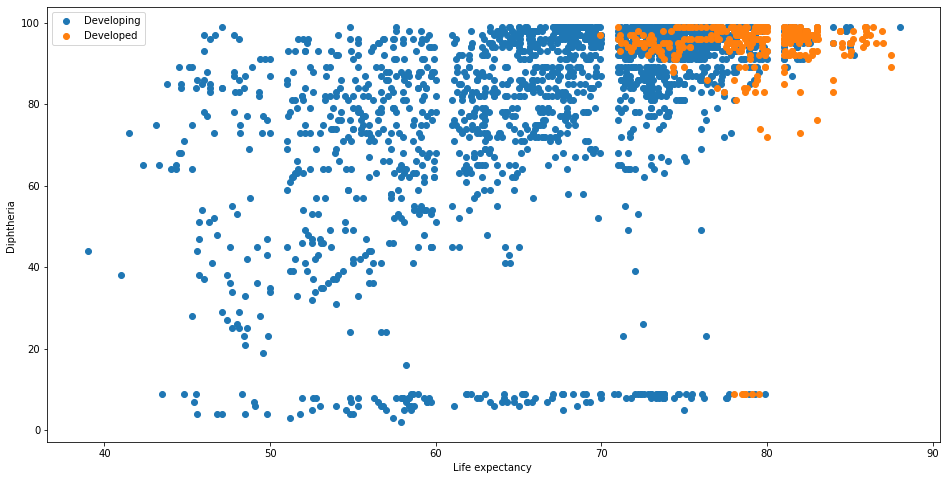

In [94]:
plt.figure(figsize=(16,8))
for status in LifeExpectancy['Status'].unique():
    plt.scatter(LifeExpectancy[LifeExpectancy['Status']==status]['Life expectancy '] , LifeExpectancy[LifeExpectancy['Status']==status]['Diphtheria '],
               label = status)
plt.xlabel('Life expectancy ')
plt.ylabel('Diphtheria ')
plt.legend()
plt.show()

In [95]:
for country in LifeExpectancy['Country'].unique():
    q75, q25 = np.percentile(LifeExpectancy[LifeExpectancy['Country'] == country]['Diphtheria '], [75 ,25])
    IQR = q75 - q25
    min_value = q25 - (IQR * 1.5)
    max_value = q75 + (IQR * 1.5)
    outlier_value_max = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['Diphtheria '] > max_value)].index
    outlier_value_min = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['Diphtheria '] < min_value)].index
    for i in outlier_value_max:
        LifeExpectancy.at[i,'Diphtheria '] = max_value 
    for j in outlier_value_min:
        LifeExpectancy.at[j,'Diphtheria '] = min_value 

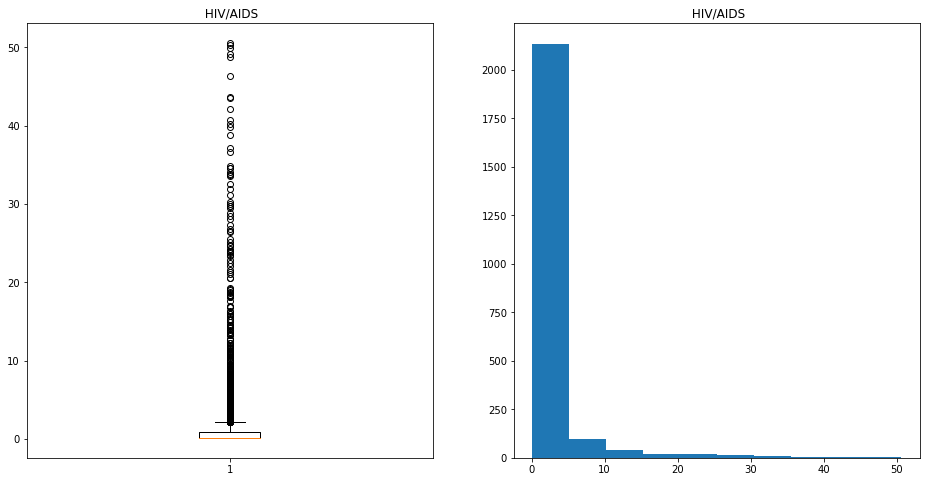

In [96]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.boxplot(LifeExpectancy[' HIV/AIDS'])
plt.title(' HIV/AIDS')
plt.subplot(1,2,2)
plt.hist(LifeExpectancy[' HIV/AIDS'])
plt.title(' HIV/AIDS')
plt.show()

In [97]:
LifeExpectancy.groupby(by='Country')[' HIV/AIDS'].mean().sort_values()

Country
Afghanistan      0.10000
Netherlands      0.10000
Morocco          0.10000
Montenegro       0.10000
Mongolia         0.10000
                  ...   
Malawi          16.68125
South Africa    18.49375
Lesotho         22.96875
Zimbabwe        23.26250
Swaziland       32.94375
Name:  HIV/AIDS, Length: 147, dtype: float64

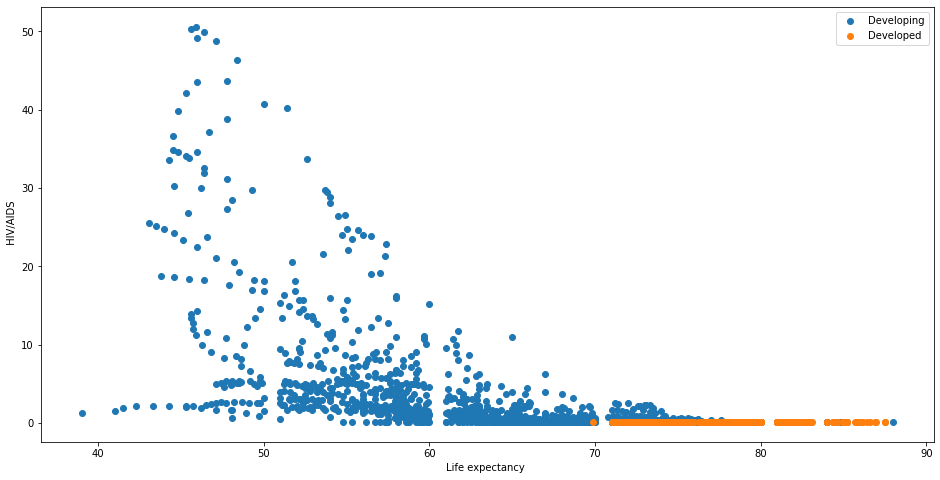

In [98]:
plt.figure(figsize=(16,8))
for status in LifeExpectancy['Status'].unique():
    plt.scatter(LifeExpectancy[LifeExpectancy['Status']==status]['Life expectancy '] , LifeExpectancy[LifeExpectancy['Status']==status][' HIV/AIDS'],
               label = status)
plt.xlabel('Life expectancy ')
plt.ylabel(' HIV/AIDS')
plt.legend()
plt.show()

In [99]:
for country in LifeExpectancy['Country'].unique():
    q75, q25 = np.percentile(LifeExpectancy[LifeExpectancy['Country'] == country][' HIV/AIDS'], [75 ,25])
    IQR = q75 - q25
    min_value = q25 - (IQR * 1.5)
    max_value = q75 + (IQR * 1.5)
    outlier_value_max = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy[' HIV/AIDS'] > max_value)].index
    outlier_value_min = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy[' HIV/AIDS'] < min_value)].index
    for i in outlier_value_max:
        LifeExpectancy.at[i,' HIV/AIDS'] = max_value 
    for j in outlier_value_min:
        LifeExpectancy.at[j,' HIV/AIDS'] = min_value 

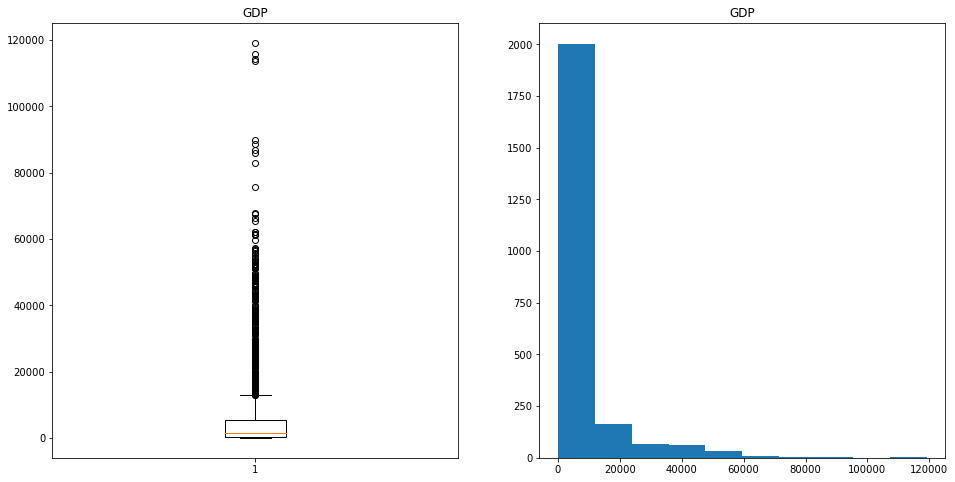

In [100]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.boxplot(LifeExpectancy['GDP'])
plt.title('GDP')
plt.subplot(1,2,2)
plt.hist(LifeExpectancy['GDP'])
plt.title('GDP')
plt.show()

In [101]:
LifeExpectancy.groupby(by='Country')['GDP'].mean().sort_values()

Country
Burundi          137.815321
Malawi           237.504042
Liberia          246.281748
Niger            259.782441
Ethiopia         264.970950
                   ...     
Ireland        33835.272005
Australia      34637.565047
Netherlands    34964.719797
Qatar          40748.444104
Luxembourg     53257.012741
Name: GDP, Length: 147, dtype: float64

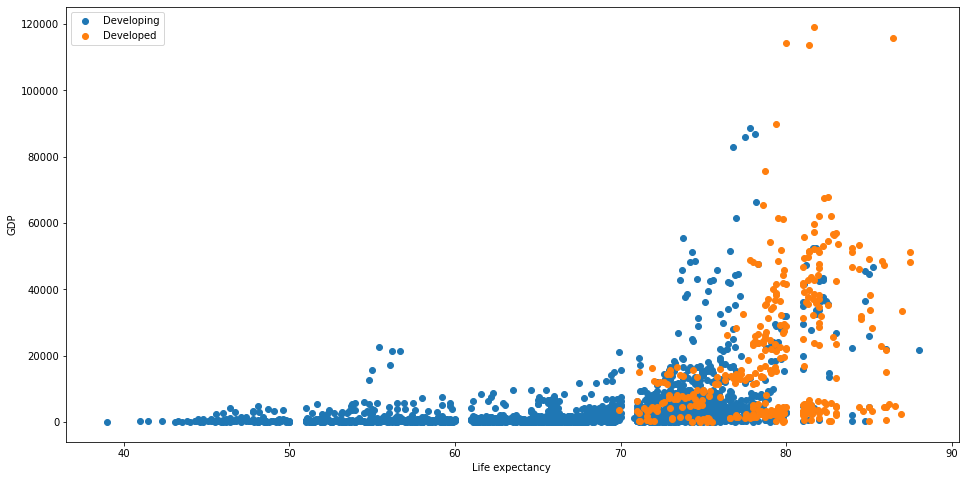

In [102]:
plt.figure(figsize=(16,8))
for status in LifeExpectancy['Status'].unique():
    plt.scatter(LifeExpectancy[LifeExpectancy['Status']==status]['Life expectancy '] , LifeExpectancy[LifeExpectancy['Status']==status]['GDP'],
               label = status)
plt.xlabel('Life expectancy ')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [103]:
for country in LifeExpectancy['Country'].unique():
    q75, q25 = np.percentile(LifeExpectancy[LifeExpectancy['Country'] == country][' HIV/AIDS'], [75 ,25])
    IQR = q75 - q25
    min_value = q25 - (IQR * 1.5)
    max_value = q75 + (IQR * 1.5)
    outlier_value_max = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['GDP'] > max_value)].index
    outlier_value_min = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['GDP'] < min_value)].index
    for i in outlier_value_max:
        LifeExpectancy.at[i,'GDP'] = max_value 
    for j in outlier_value_min:
        LifeExpectancy.at[j,'GDP'] = min_value 

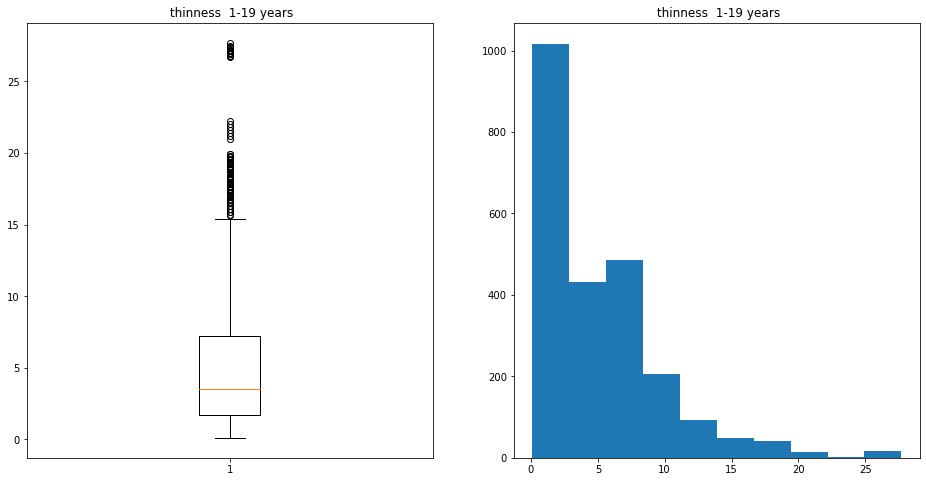

In [104]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.boxplot(LifeExpectancy[' thinness  1-19 years'])
plt.title(' thinness  1-19 years')
plt.subplot(1,2,2)
plt.hist(LifeExpectancy[' thinness  1-19 years'])
plt.title(' thinness  1-19 years')
plt.show()

In [105]:
LifeExpectancy.groupby(by='Country')[' thinness  1-19 years'].mean().sort_values()

Country
Tonga           0.10000
Kiribati        0.15625
Samoa           0.20000
Ireland         0.30000
New Zealand     0.31250
                 ...   
Sri Lanka      15.32500
Afghanistan    16.58125
Nepal          17.13125
Bhutan         17.21875
India          27.10000
Name:  thinness  1-19 years, Length: 147, dtype: float64

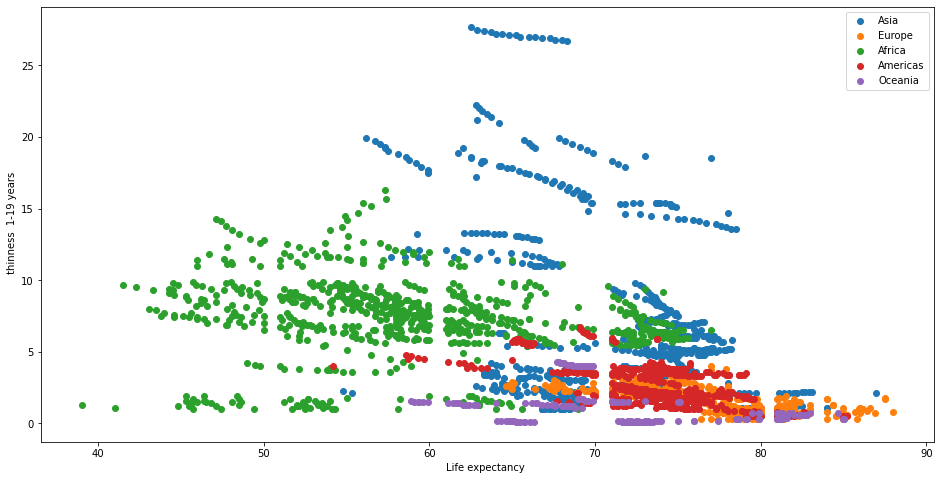

In [106]:
plt.figure(figsize=(16,8))
for region in LifeExpectancy['region'].unique():
    plt.scatter(LifeExpectancy[LifeExpectancy['region']==region]['Life expectancy '] , LifeExpectancy[LifeExpectancy['region']==region][' thinness  1-19 years'],
               label = region)

    
plt.legend()
plt.xlabel('Life expectancy ')
plt.ylabel(' thinness  1-19 years')

plt.show()

In [107]:
for country in LifeExpectancy['Country'].unique():
    q75, q25 = np.percentile(LifeExpectancy[LifeExpectancy['Country'] == country][' thinness  1-19 years'], [75 ,25])
    IQR = q75 - q25
    min_value = q25 - (IQR * 1.5)
    max_value = q75 + (IQR * 1.5)
    outlier_value_max = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy[' thinness  1-19 years'] > max_value)].index
    outlier_value_min = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy[' thinness  1-19 years'] < min_value)].index
    for i in outlier_value_max:
        LifeExpectancy.at[i,' thinness  1-19 years'] = max_value 
    for j in outlier_value_min:
        LifeExpectancy.at[j,' thinness  1-19 years'] = min_value 

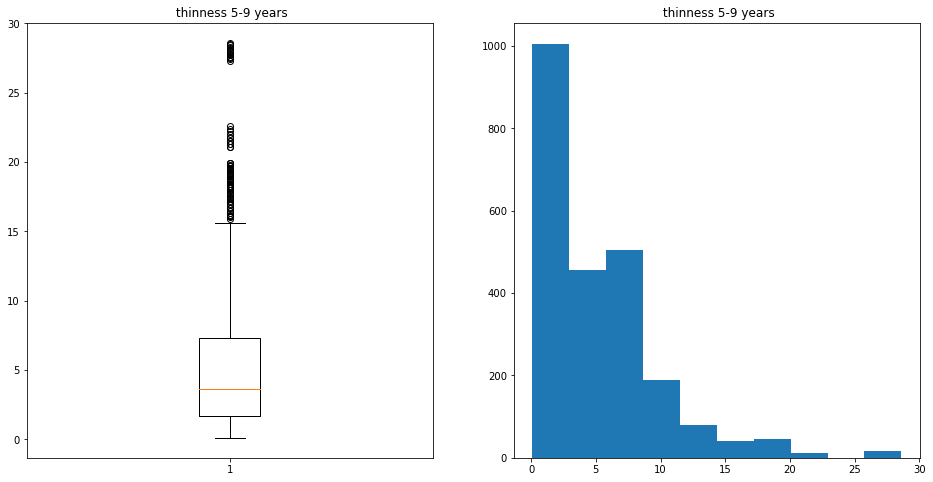

In [108]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.boxplot(LifeExpectancy[' thinness 5-9 years'])
plt.title(' thinness 5-9 years')
plt.subplot(1,2,2)
plt.hist(LifeExpectancy[' thinness 5-9 years'])
plt.title(' thinness 5-9 years')
plt.show()

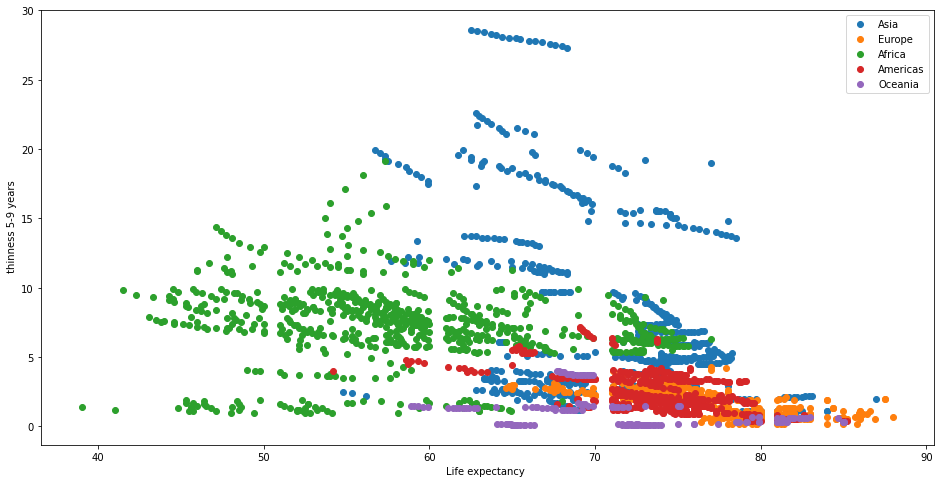

In [109]:
plt.figure(figsize=(16,8))
for region in LifeExpectancy['region'].unique():
    plt.scatter(LifeExpectancy[LifeExpectancy['region']==region]['Life expectancy '] , LifeExpectancy[LifeExpectancy['region']==region][' thinness 5-9 years'],
               label = region)

    
plt.legend()
plt.xlabel('Life expectancy ')
plt.ylabel(' thinness 5-9 years')

plt.show()

In [110]:
for country in LifeExpectancy['Country'].unique():
    q75, q25 = np.percentile(LifeExpectancy[LifeExpectancy['Country'] == country][' thinness 5-9 years'], [75 ,25])
    IQR = q75 - q25
    min_value = q25 - (IQR * 1.5)
    max_value = q75 + (IQR * 1.5)
    outlier_value_max = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy[' thinness 5-9 years'] > max_value)].index
    outlier_value_min = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy[' thinness 5-9 years'] < min_value)].index
    for i in outlier_value_max:
        LifeExpectancy.at[i,' thinness 5-9 years'] = max_value 
    for j in outlier_value_min:
        LifeExpectancy.at[j,' thinness 5-9 years'] = min_value 

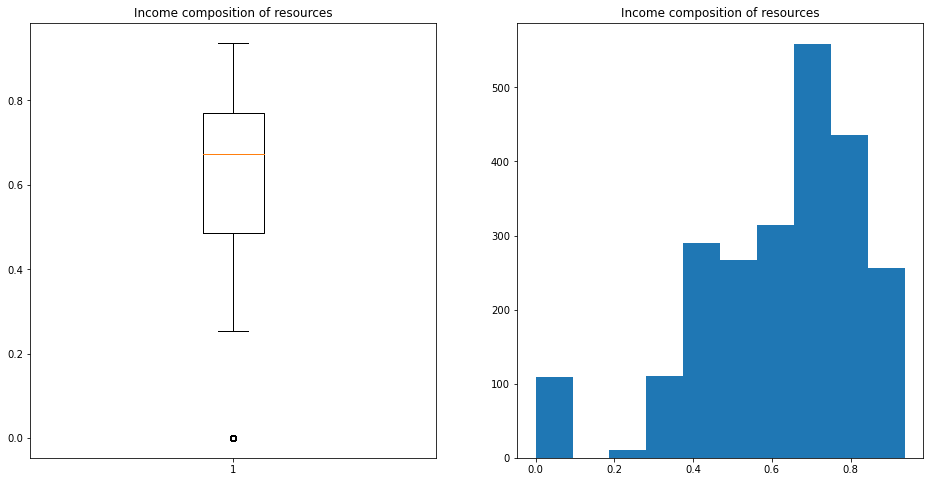

In [111]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.boxplot(LifeExpectancy['Income composition of resources'])
plt.title('Income composition of resources')
plt.subplot(1,2,2)
plt.hist(LifeExpectancy['Income composition of resources'])
plt.title('Income composition of resources')
plt.show()

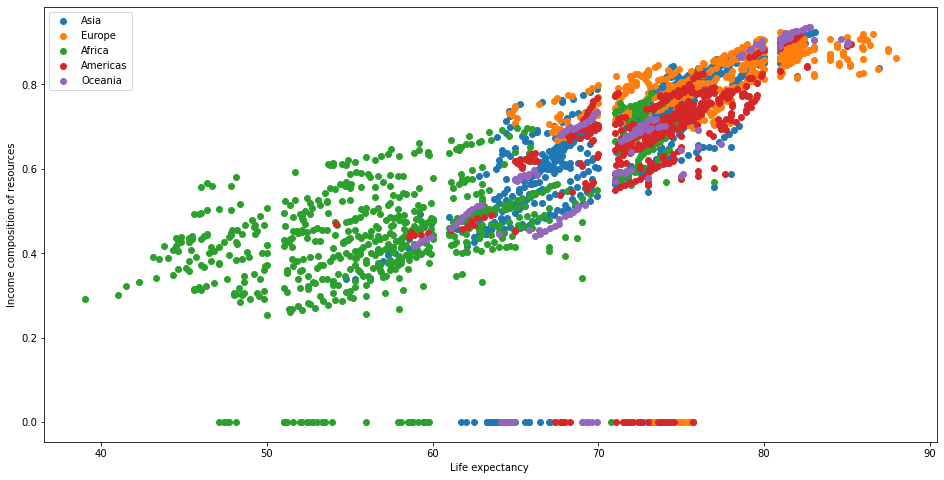

In [112]:
plt.figure(figsize=(16,8))
for region in LifeExpectancy['region'].unique():
    plt.scatter(LifeExpectancy[LifeExpectancy['region']==region]['Life expectancy '] , LifeExpectancy[LifeExpectancy['region']==region]['Income composition of resources'],
               label = region)

    
plt.legend()
plt.xlabel('Life expectancy ')
plt.ylabel('Income composition of resources')

plt.show()

In [113]:
for country in LifeExpectancy['Country'].unique():
    q75, q25 = np.percentile(LifeExpectancy[LifeExpectancy['Country'] == country]['Income composition of resources'], [75 ,25])
    IQR = q75 - q25
    min_value = q25 - (IQR * 1.5)
    max_value = q75 + (IQR * 1.5)
    outlier_value_max = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['Income composition of resources'] > max_value)].index
    outlier_value_min = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['Income composition of resources'] < min_value)].index
    for i in outlier_value_max:
        LifeExpectancy.at[i,'Income composition of resources'] = max_value 
    for j in outlier_value_min:
        LifeExpectancy.at[j,'Income composition of resources'] = min_value 

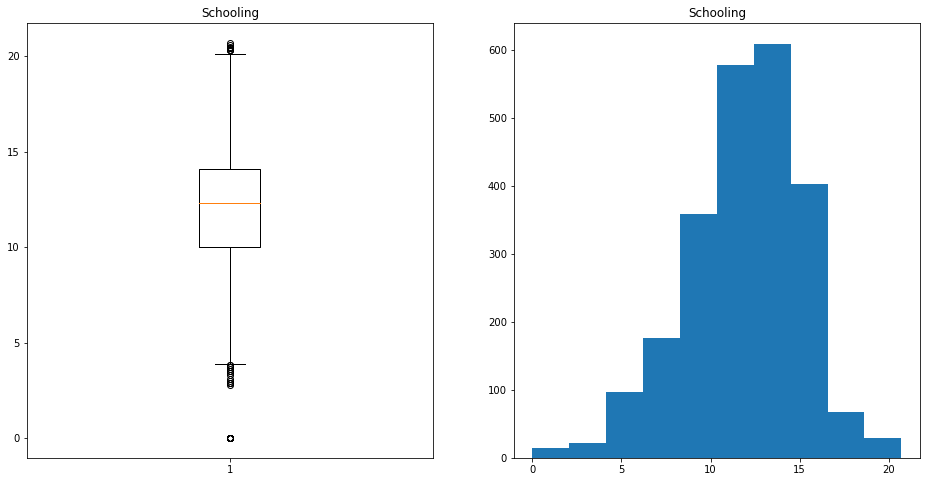

In [114]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.boxplot(LifeExpectancy['Schooling'])
plt.title('Schooling')
plt.subplot(1,2,2)
plt.hist(LifeExpectancy['Schooling'])
plt.title('Schooling')
plt.show()

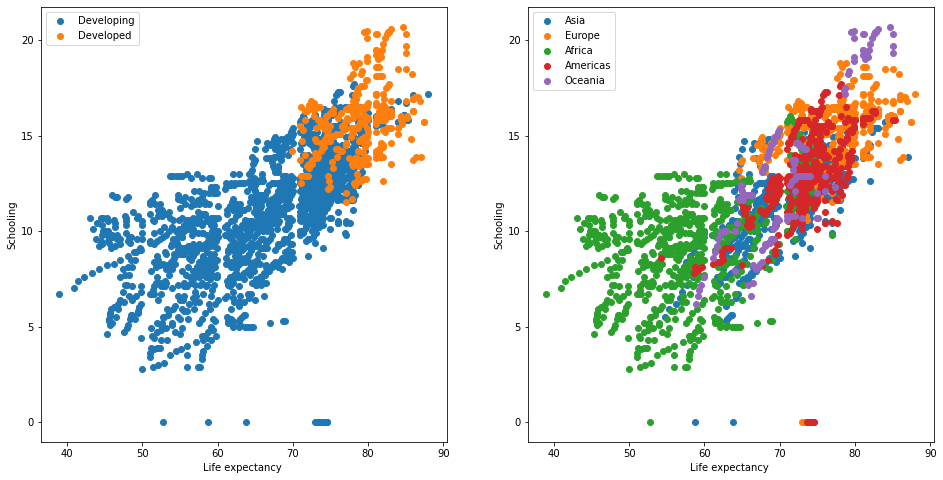

In [115]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
for status in LifeExpectancy['Status'].unique():
    plt.scatter(LifeExpectancy[LifeExpectancy['Status']==status]['Life expectancy '] , LifeExpectancy[LifeExpectancy['Status']==status]['Schooling'],
               label = status)
plt.xlabel('Life expectancy ')
plt.ylabel('Schooling')
plt.legend()

plt.subplot(1,2,2)
for region in LifeExpectancy['region'].unique():
    plt.scatter(LifeExpectancy[LifeExpectancy['region']==region]['Life expectancy '] , LifeExpectancy[LifeExpectancy['region']==region]['Schooling'],
               label = region)

    
plt.legend()
plt.xlabel('Life expectancy ')
plt.ylabel('Schooling')

plt.show()

In [116]:
for country in LifeExpectancy['Country'].unique():
    q75, q25 = np.percentile(LifeExpectancy[LifeExpectancy['Country'] == country]['Schooling'], [75 ,25])
    IQR = q75 - q25
    min_value = q25 - (IQR * 1.5)
    max_value = q75 + (IQR * 1.5)
    outlier_value_max = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['Schooling'] > max_value)].index
    outlier_value_min = LifeExpectancy[(LifeExpectancy['Country'] == country) & (LifeExpectancy['Schooling'] < min_value)].index
    for i in outlier_value_max:
        LifeExpectancy.at[i,'Schooling'] = max_value 
    for j in outlier_value_min:
        LifeExpectancy.at[j,'Schooling'] = min_value 

 # Data Exploration - Multivariate Analysis

In [117]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn.preprocessing import scale

In [118]:
LifeExpectancy

,region,sub-region,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Asia,Southern Asia,Afghanistan,2015,Developing,62.8,263.0,62,0.01,71.279624,...,83,6.000,8.16,65.0,0.1,0.10000,17.2000,17.3000,0.479,10.1
1,Asia,Southern Asia,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,...,86,58.000,8.18,62.0,0.1,0.10000,17.5000,17.5000,0.476,10.0
2,Asia,Southern Asia,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,...,89,62.000,8.13,64.0,0.1,0.10000,17.7000,17.7000,0.470,9.9
3,Asia,Southern Asia,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,...,93,67.000,8.52,67.0,0.1,0.10000,17.9000,18.0000,0.463,9.8
4,Asia,Southern Asia,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,...,97,68.000,7.87,68.0,0.1,0.10000,18.2000,18.2000,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Africa,Sub-Saharan Africa,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,...,42,67.000,7.13,65.0,33.6,67.67500,9.4000,9.4000,0.407,9.2
2934,Africa,Sub-Saharan Africa,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,...,41,41.625,6.52,68.0,36.7,67.67500,9.8000,9.9000,0.418,9.5
2935,Africa,Sub-Saharan Africa,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,...,40,73.000,6.53,71.0,39.8,57.34834,2.2625,1.7625,0.427,10.0
2936,Africa,Sub-Saharan Africa,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,...,39,76.000,6.16,75.0,42.1,67.67500,2.2625,1.7625,0.427,9.8


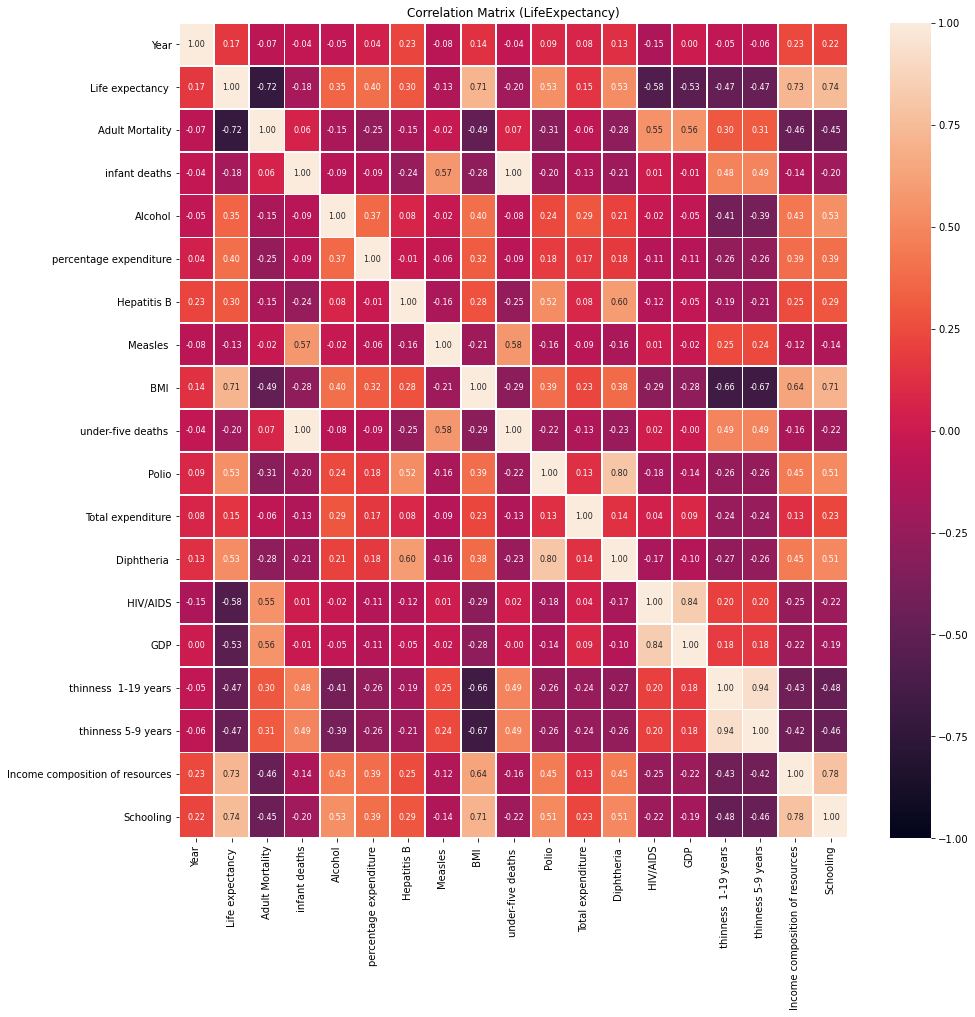

In [119]:
corr = LifeExpectancy.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr , annot=True, fmt='.2f', annot_kws={"size": 8}, linewidths=.8, vmin=-1, vmax=1)
plt.title("Correlation Matrix (LifeExpectancy)")
plt.show()

In [120]:
LifeExpectancy.drop(['Income composition of resources',' BMI ','infant deaths','Diphtheria ',' thinness 5-9 years','GDP'] , axis = 1 , inplace = True)

In [121]:
LifeExpectancy.columns

Index(['region', 'sub-region', 'Country', 'Year', 'Status', 'Life expectancy ',
       'Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', 'under-five deaths ', 'Polio', 'Total expenditure',
       ' HIV/AIDS', ' thinness  1-19 years', 'Schooling'],
      dtype='object')

# Feature Engineering

In [122]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn.preprocessing import scale

In [123]:
country = pd.DataFrame(LifeExpectancy['Country'].unique())
country.columns = ['country']
for i in LifeExpectancy['Country'].unique():
    LifeExpectancy.loc[LifeExpectancy['Country'] == i , 'country_num'] = country[country['country'] == i ].index[0]
    
region = pd.DataFrame(LifeExpectancy['region'].unique())
region.columns = ['region']
for i in LifeExpectancy['region'].unique():
    LifeExpectancy.loc[LifeExpectancy['region'] == i , 'region_num'] = region[region['region'] == i ].index[0]
    
sub_region = pd.DataFrame(LifeExpectancy['sub-region'].unique())
sub_region.columns = ['sub-region']
for i in LifeExpectancy['sub-region'].unique():
    LifeExpectancy.loc[LifeExpectancy['sub-region'] == i , 'sub_region_num'] = sub_region[sub_region['sub-region'] == i ].index[0]

In [124]:
status_developing = pd.get_dummies(LifeExpectancy['Status'] , drop_first=True)
LifeExpectancy.loc[:,'Status'] = status_developing.values

In [125]:
LifeExpectancy.head()

,region,sub-region,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,under-five deaths,Polio,Total expenditure,HIV/AIDS,thinness 1-19 years,Schooling,country_num,region_num,sub_region_num
0,Asia,Southern Asia,Afghanistan,2015,1,62.8,263.0,0.01,71.279624,65.0,1154,83,6.0,8.16,0.1,17.2,10.1,0.0,0.0,0.0
1,Asia,Southern Asia,Afghanistan,2014,1,59.9,271.0,0.01,73.523582,62.0,492,86,58.0,8.18,0.1,17.5,10.0,0.0,0.0,0.0
2,Asia,Southern Asia,Afghanistan,2013,1,59.9,268.0,0.01,73.219243,64.0,430,89,62.0,8.13,0.1,17.7,9.9,0.0,0.0,0.0
3,Asia,Southern Asia,Afghanistan,2012,1,59.5,272.0,0.01,78.184215,67.0,2787,93,67.0,8.52,0.1,17.9,9.8,0.0,0.0,0.0
4,Asia,Southern Asia,Afghanistan,2011,1,59.2,275.0,0.01,7.097109,68.0,3013,97,68.0,7.87,0.1,18.2,9.5,0.0,0.0,0.0


In [126]:
test = pd.DataFrame(columns=['variable', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'log_jarque_bera_stats', 'log_jarque_bera_p_value'])
for variable in LifeExpectancy.select_dtypes(exclude='object').columns:
    jb_stats = jarque_bera(LifeExpectancy[variable])
    jb_stats_2 = jarque_bera(np.log(LifeExpectancy[variable] + 1))
    test = test.append({"variable": variable,  "jarque_bera_stats" : jb_stats[0] ,
                                               "jarque_bera_p_value" : jb_stats[1] ,
                                               'log_jarque_bera_stats' : jb_stats_2[0],
                                               'log_jarque_bera_p_value' : jb_stats_2[1] 
                                               }, ignore_index=True)
test

,variable,jarque_bera_stats,jarque_bera_p_value,log_jarque_bera_stats,log_jarque_bera_p_value
0,Year,1.433423e+02,0.000000e+00,143.342855,0.000000e+00
1,Status,2.093389e+03,0.000000e+00,2093.388889,0.000000e+00
2,Life expectancy,1.885179e+02,0.000000e+00,387.333616,0.000000e+00
3,Adult Mortality,1.167748e+03,0.000000e+00,1292.506094,0.000000e+00
4,Alcohol,2.240511e+02,0.000000e+00,183.631629,0.000000e+00
5,percentage expenditure,8.222451e+04,0.000000e+00,42.608001,5.594873e-10
6,Hepatitis B,1.244004e+03,0.000000e+00,9875.449693,0.000000e+00
7,Measles,1.189454e+06,0.000000e+00,193.322445,0.000000e+00
8,under-five deaths,8.596699e+05,0.000000e+00,209.858583,0.000000e+00
9,Polio,2.964928e+03,0.000000e+00,51854.440341,0.000000e+00


In [127]:
LifeExpectancyScale = LifeExpectancy.copy()
for i in LifeExpectancyScale.select_dtypes(exclude='object').columns:
    LifeExpectancyScale[i] = scale(LifeExpectancyScale[i])

In [133]:
X = LifeExpectancyScale.select_dtypes(exclude='object').values
X = StandardScaler().fit_transform(LifeExpectancyScale.select_dtypes(exclude='object'))
pca = PCA(n_components=17)
principalComponents=pca.fit_transform(X)

In [134]:
exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(cumsum_var)

[ 26.5   37.55  47.51  55.37  62.2   68.31  73.83  78.89  82.61  86.04
  89.1   91.9   94.12  96.08  97.74  99.31 100.01]
